
 Slice 1


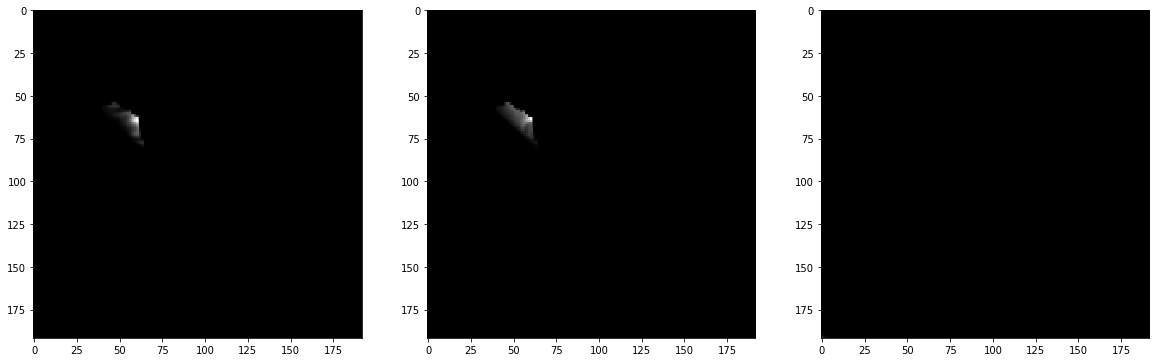


 Slice 2


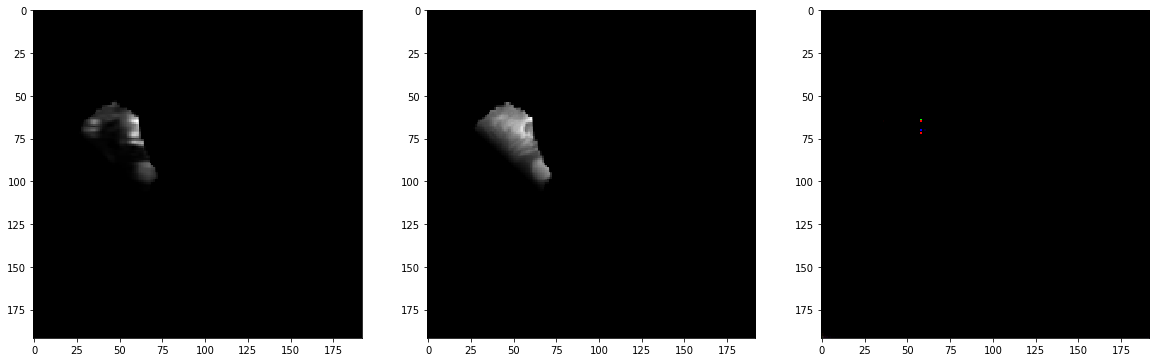


 Slice 3


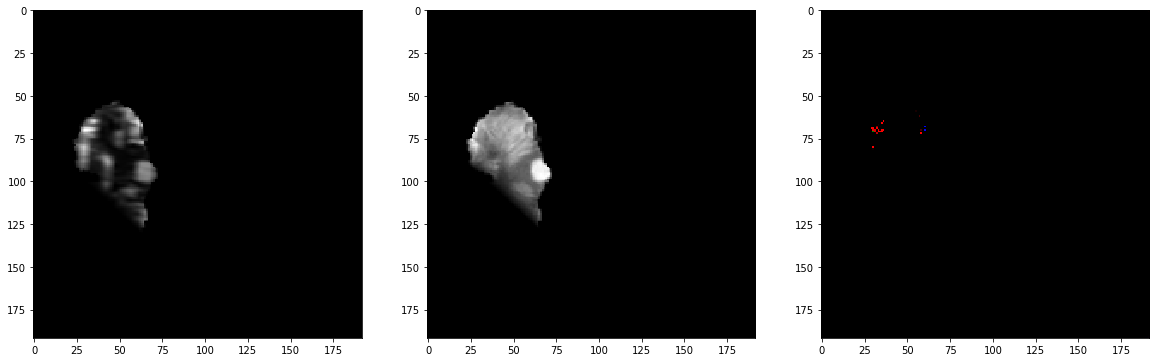


 Slice 4


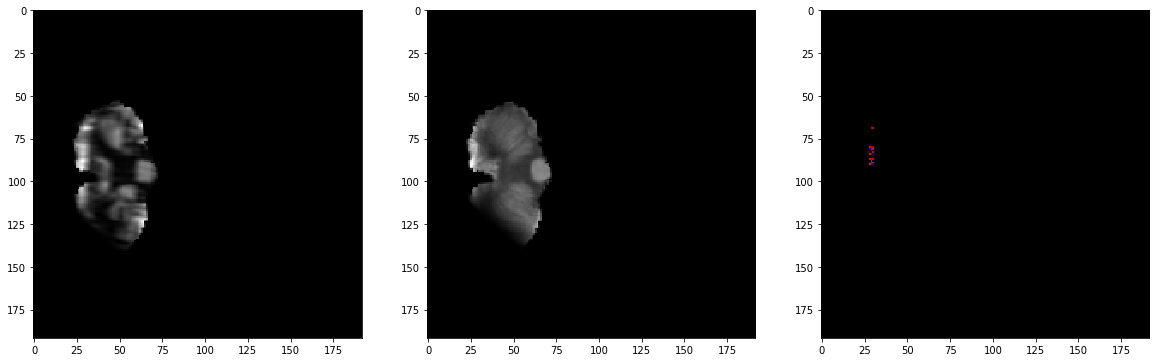


 Slice 5


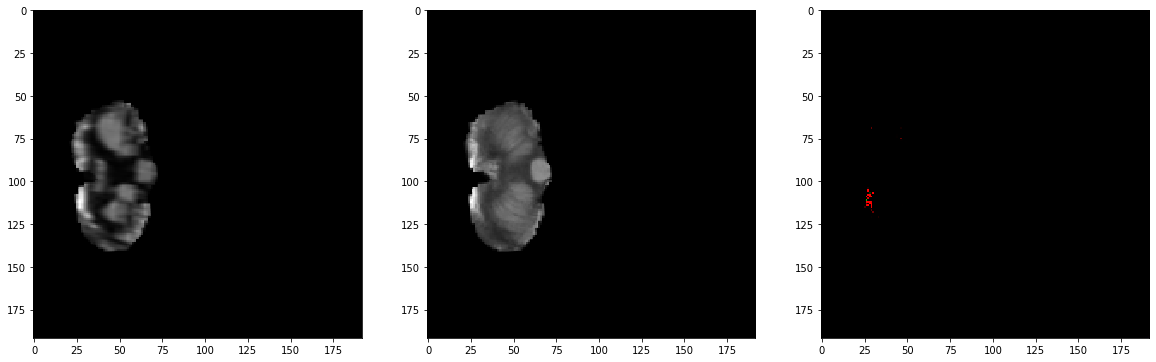


 Slice 6


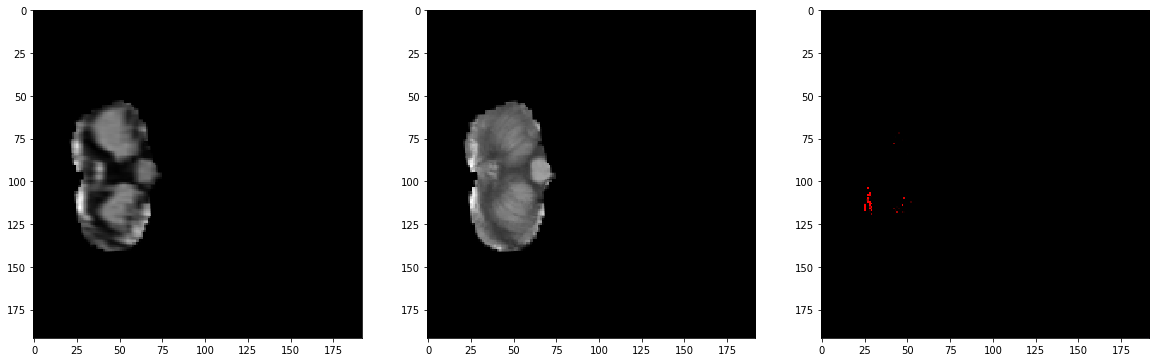


 Slice 7


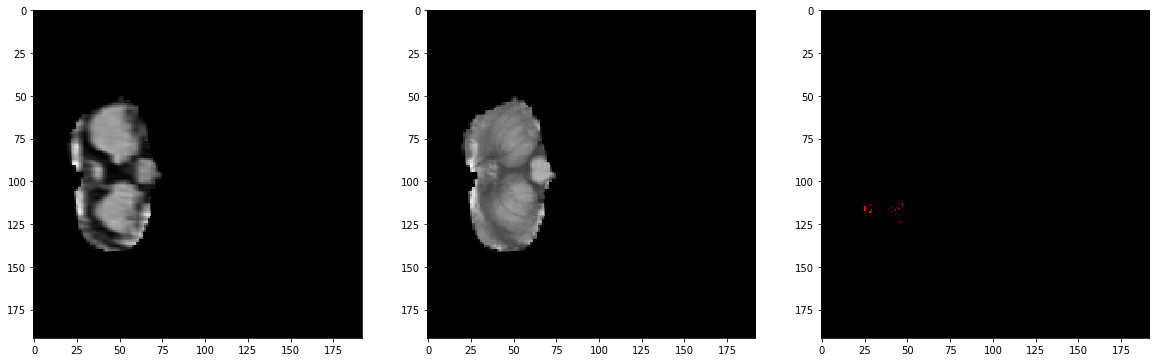


 Slice 8


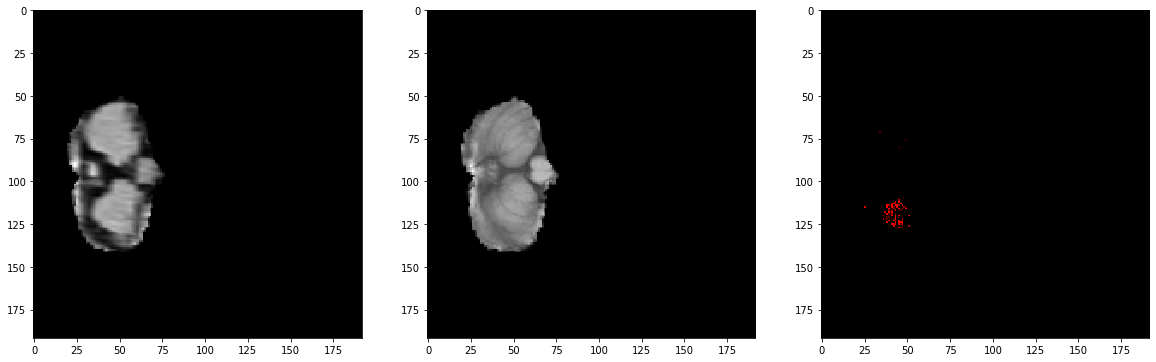


 Slice 9


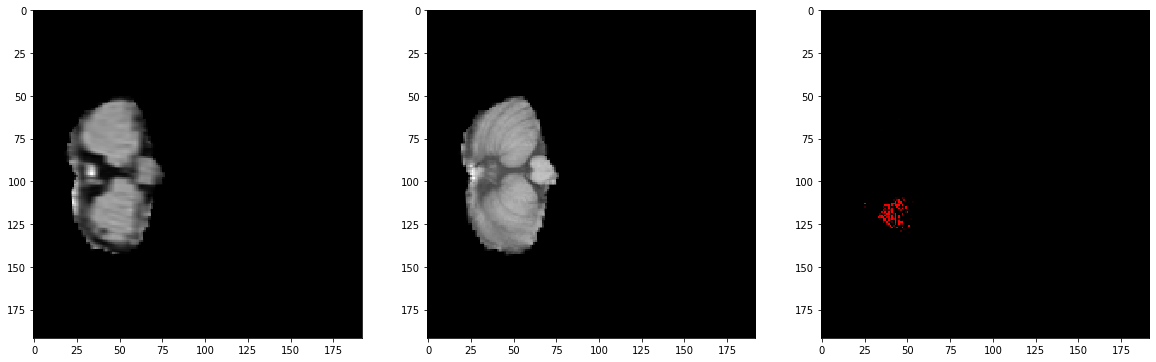


 Slice 10


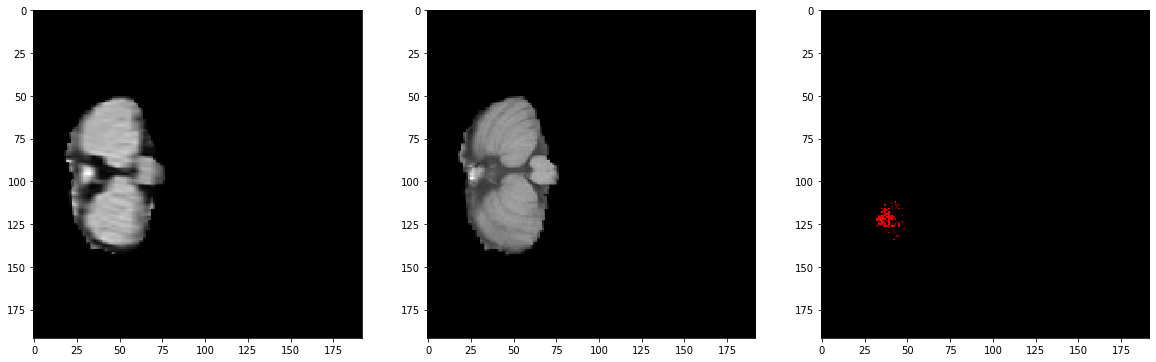


 Slice 11


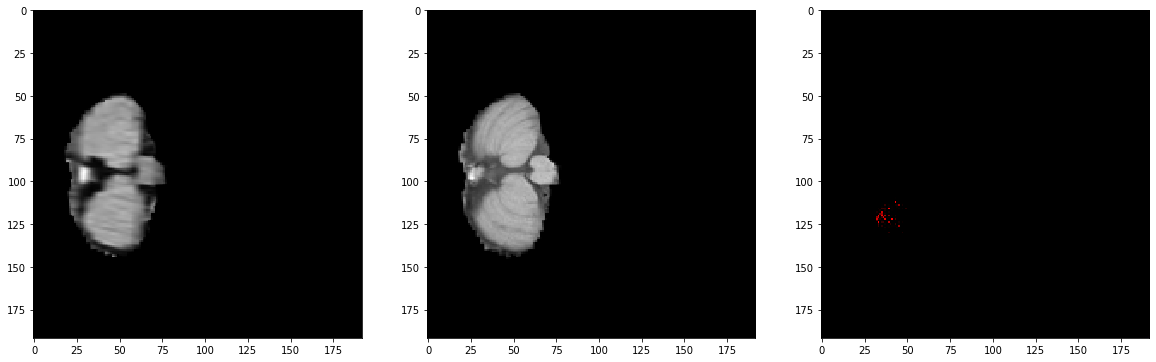


 Slice 12


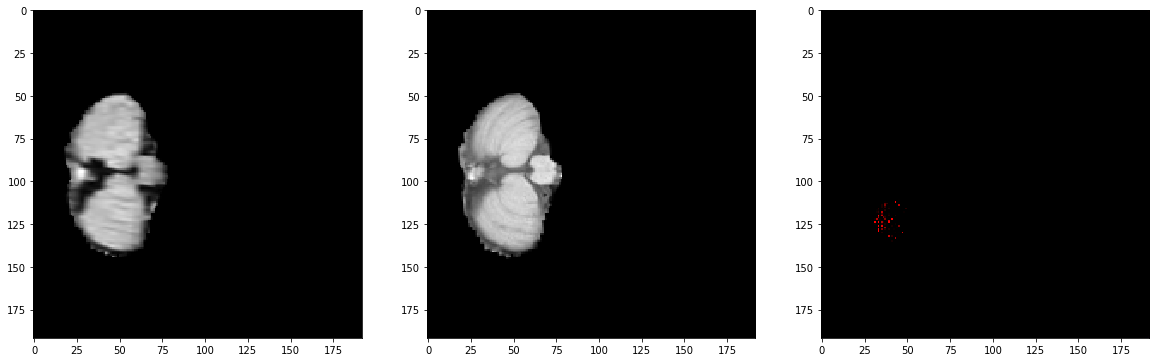


 Slice 13


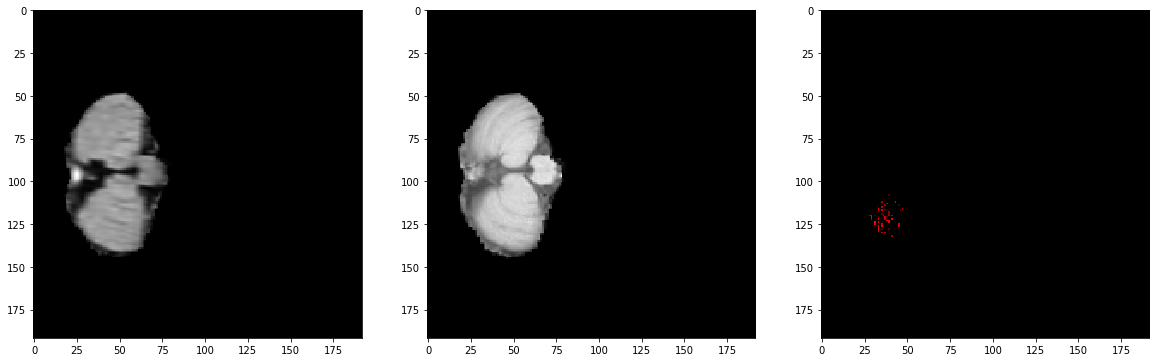


 Slice 14


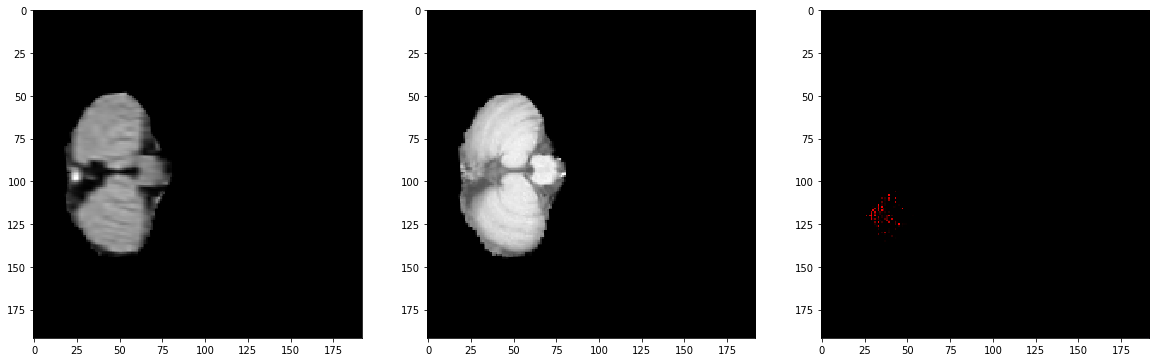


 Slice 15


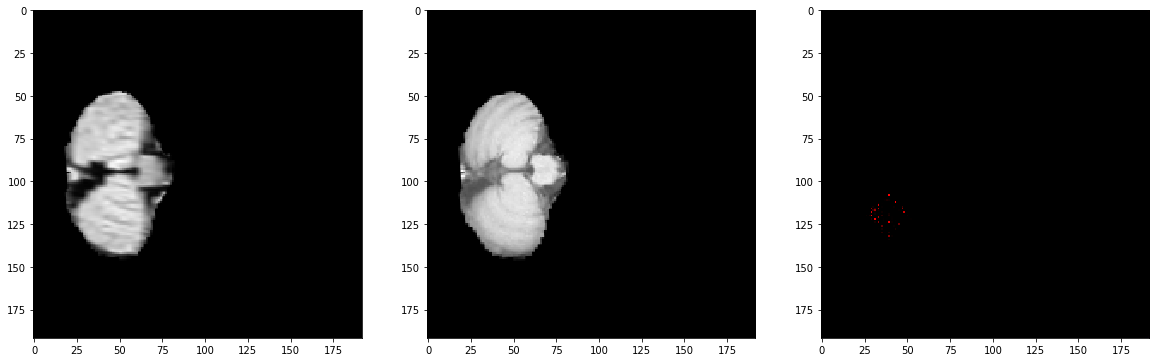


 Slice 16


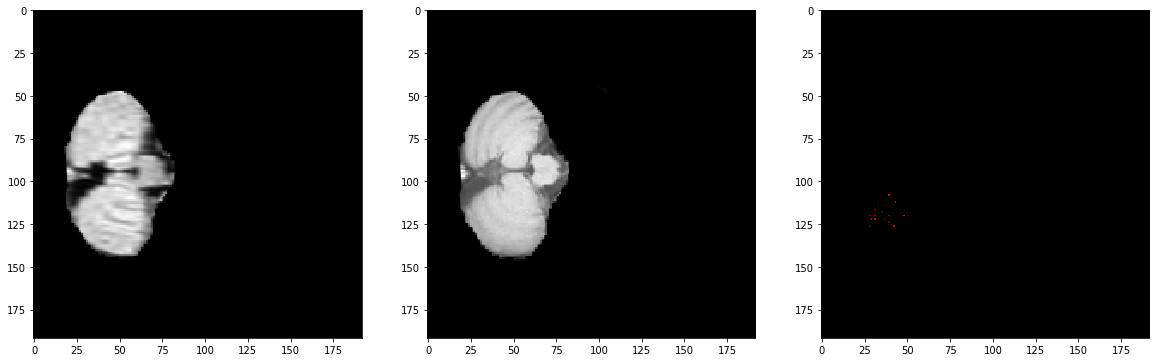


 Slice 17


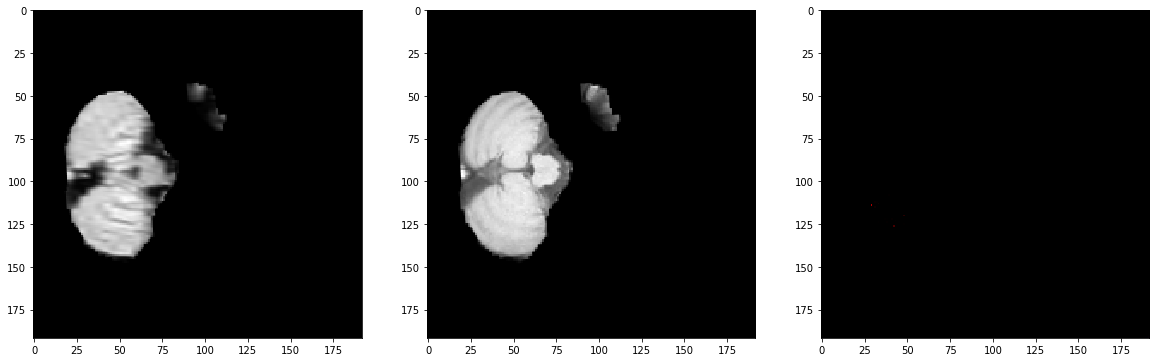


 Slice 18


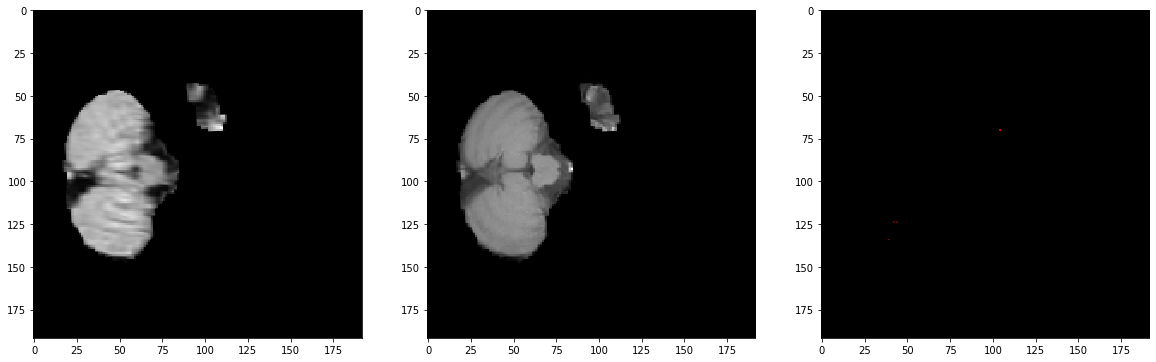


 Slice 19


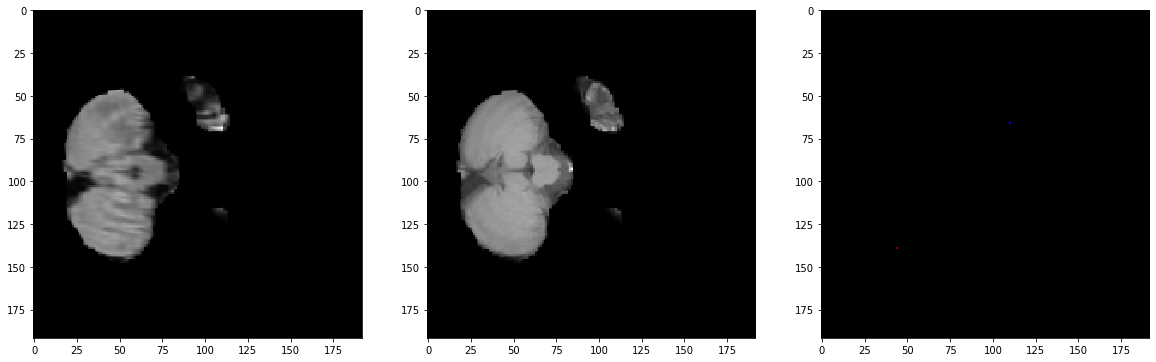


 Slice 20


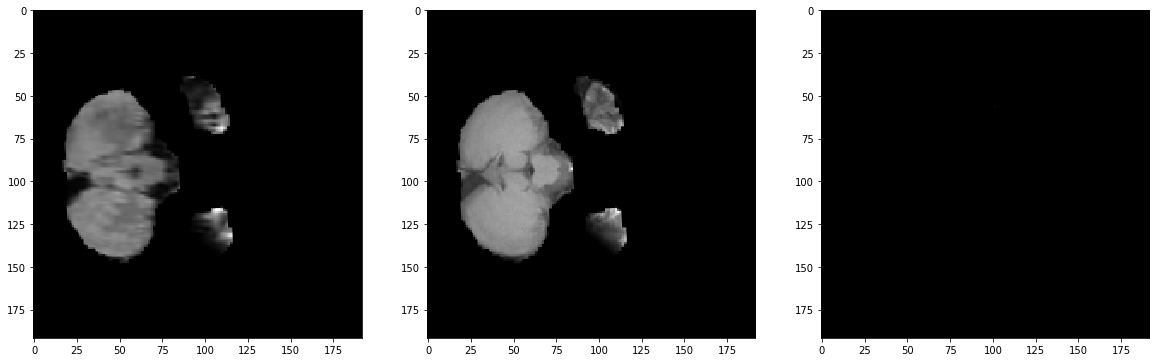


 Slice 21


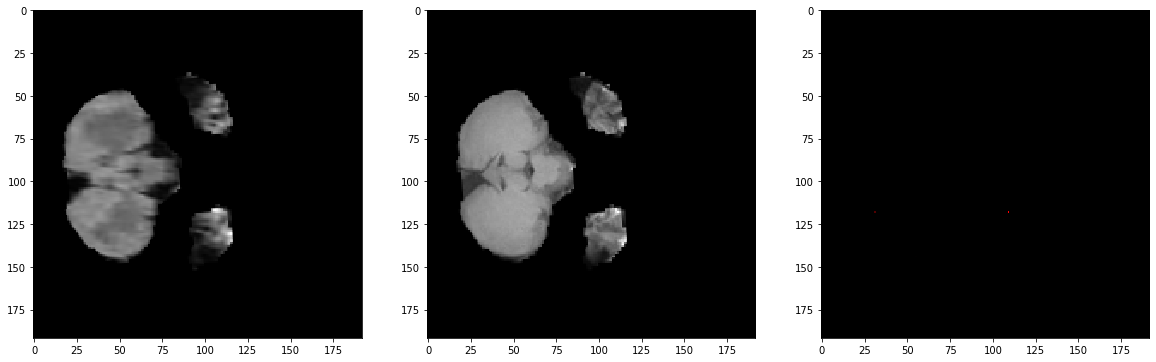


 Slice 22


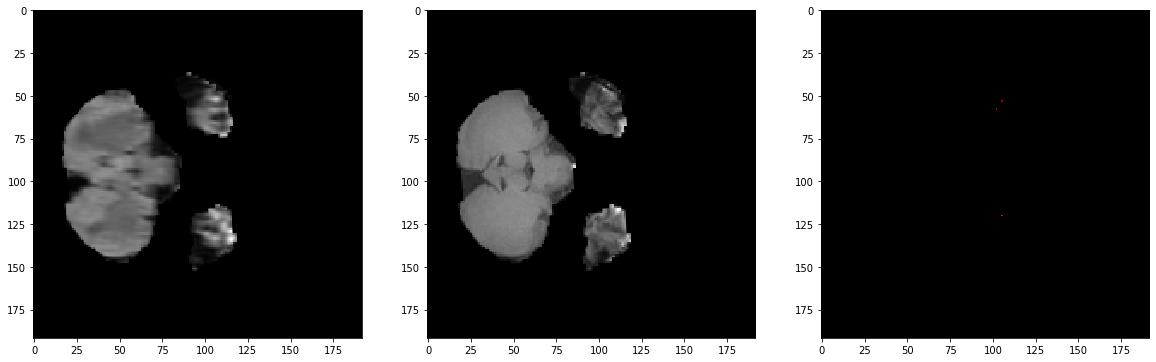


 Slice 23


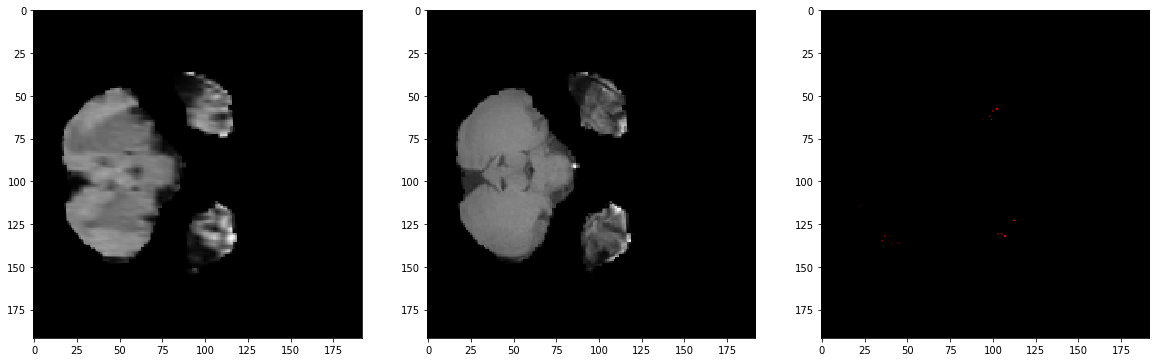


 Slice 24


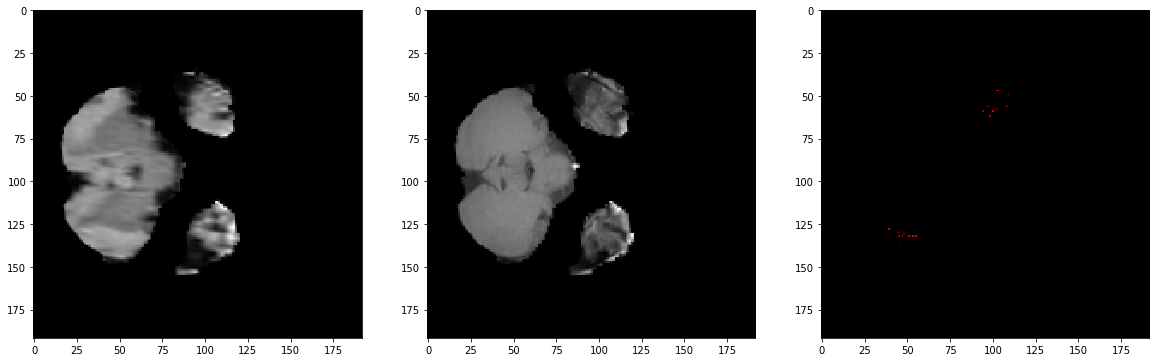


 Slice 25


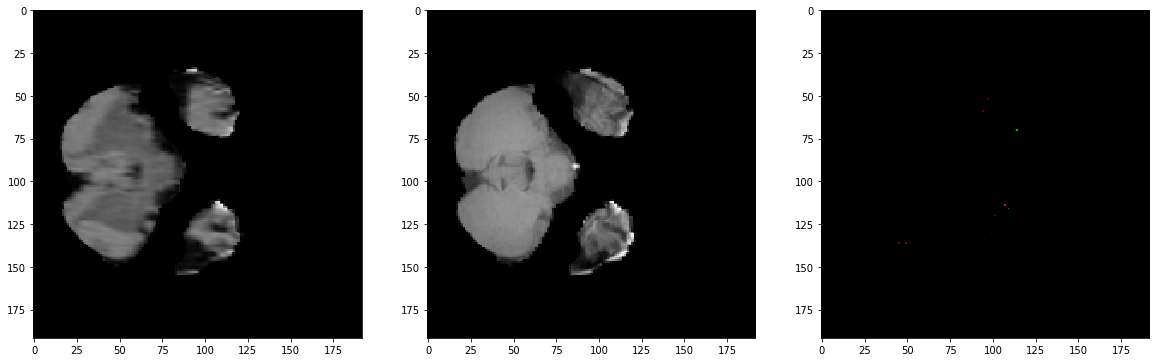


 Slice 26


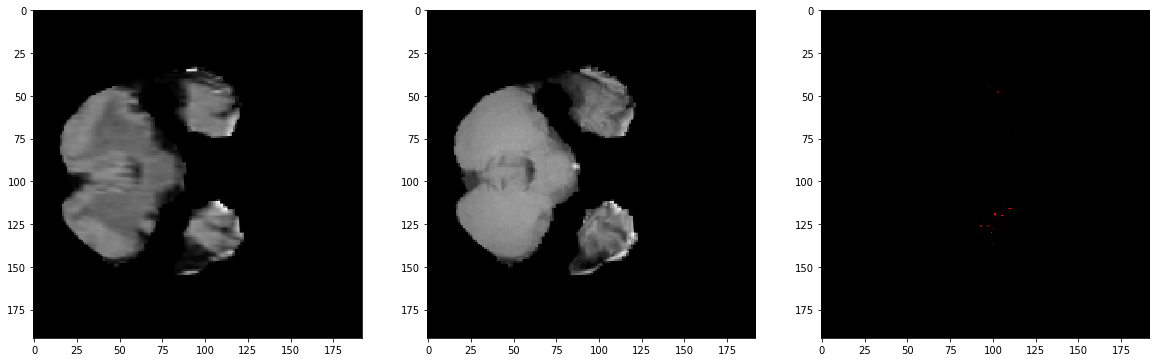


 Slice 27


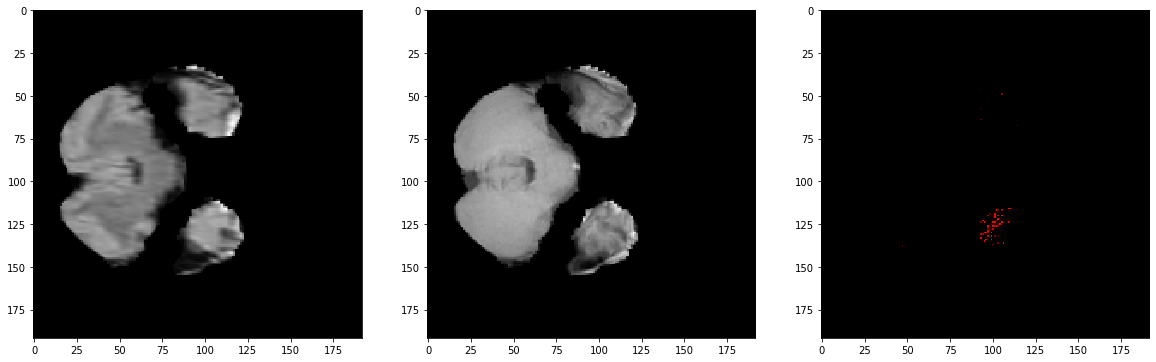


 Slice 28


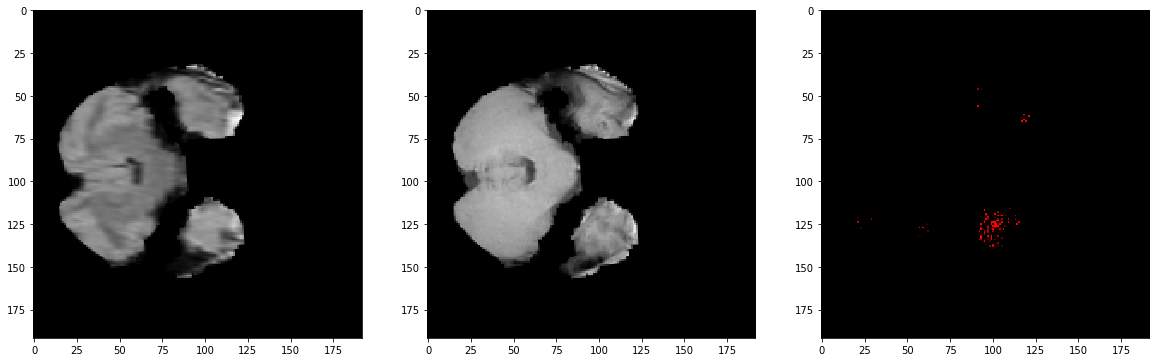


 Slice 29


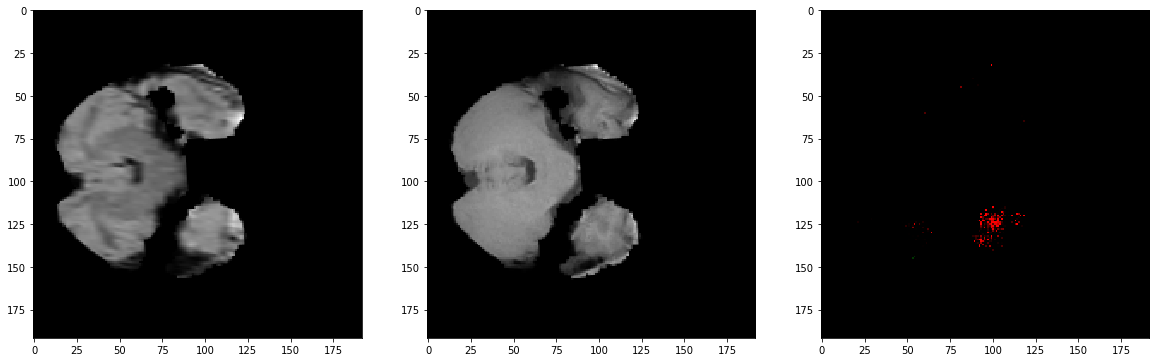


 Slice 30


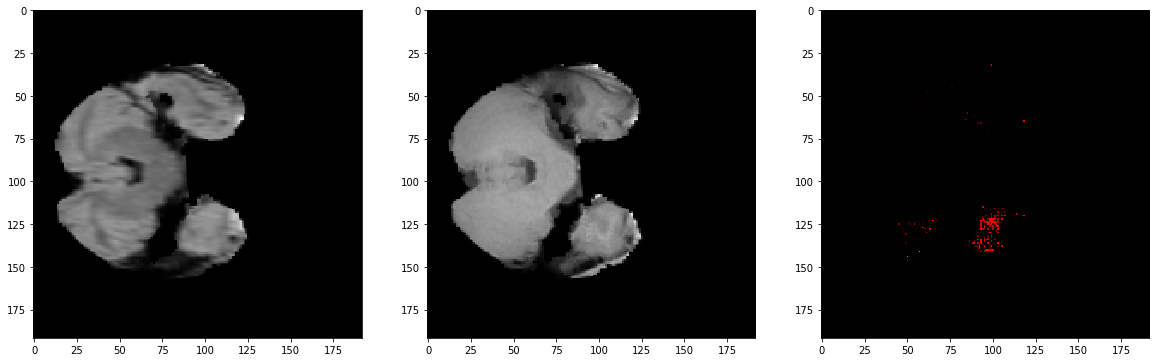


 Slice 31


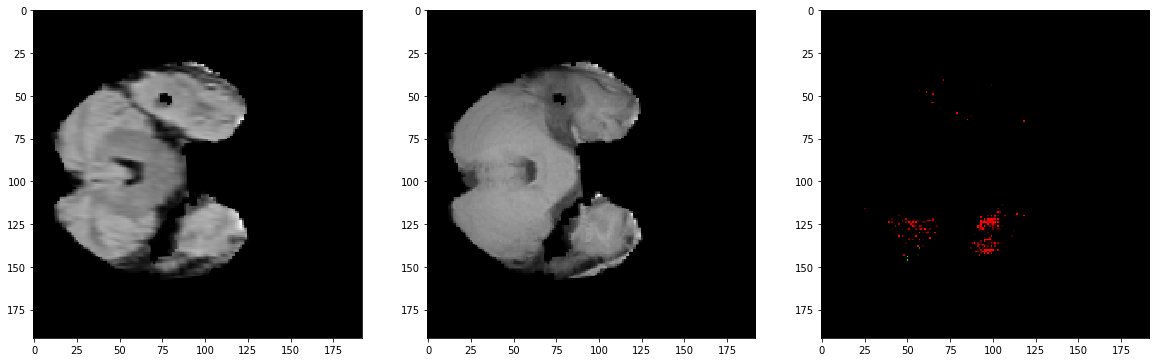


 Slice 32


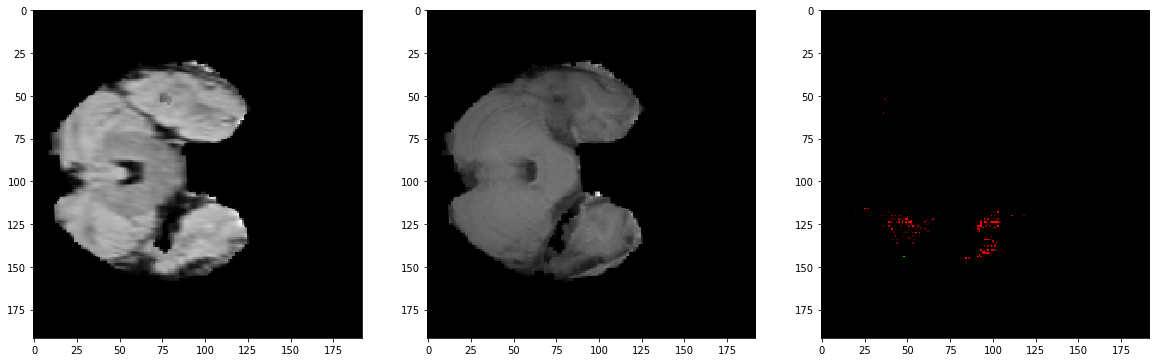


 Slice 33


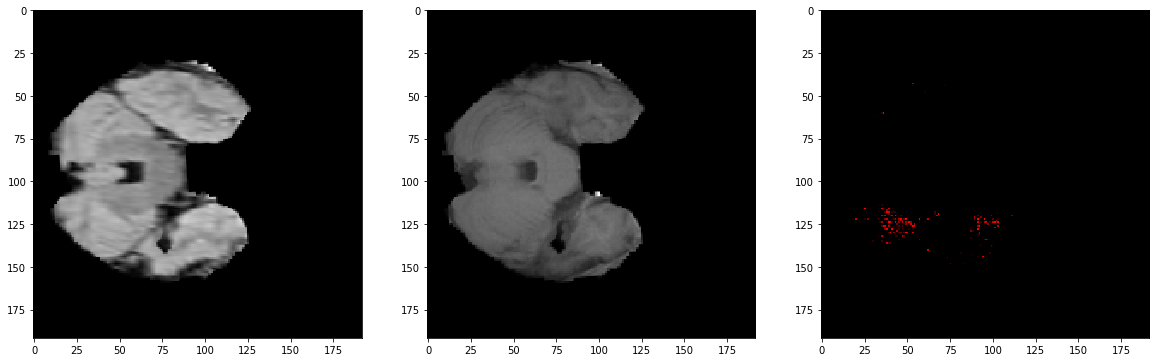


 Slice 34


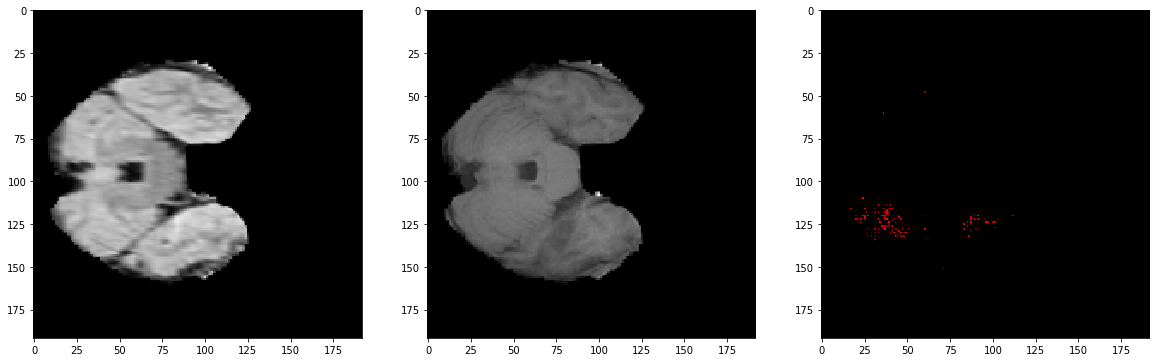


 Slice 35


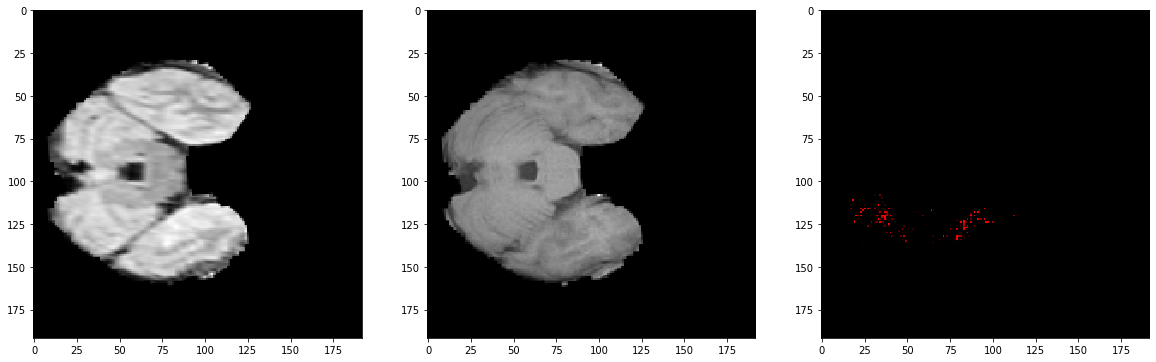


 Slice 36


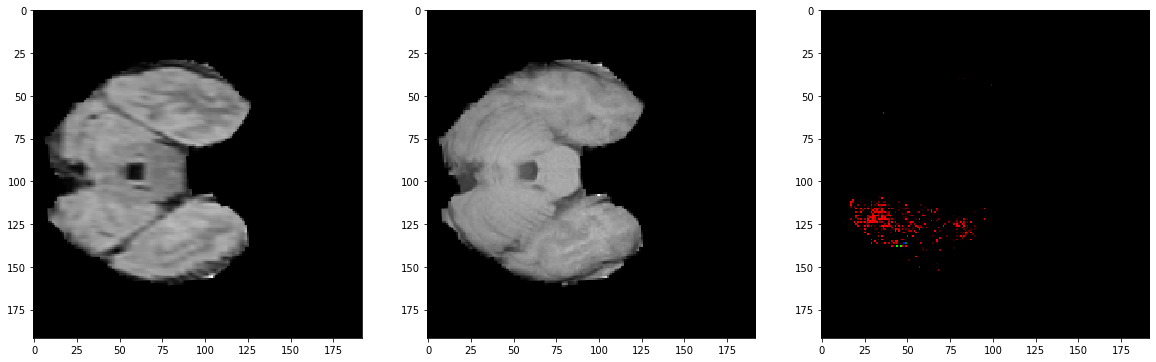


 Slice 37


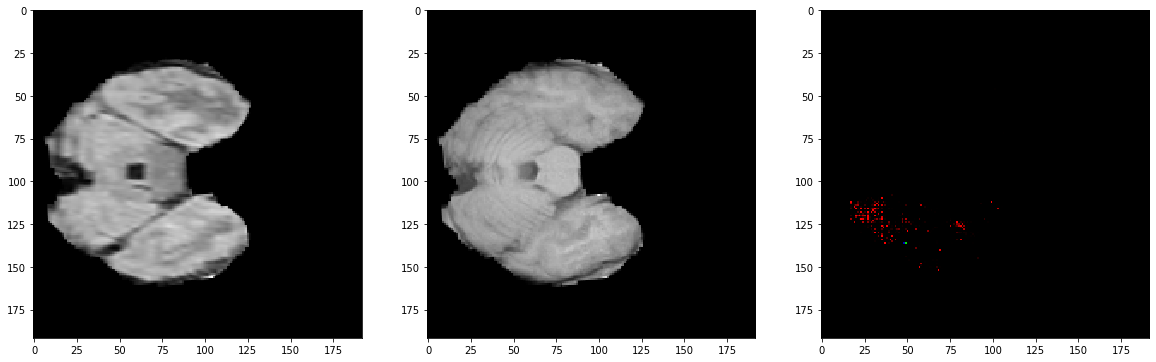


 Slice 38


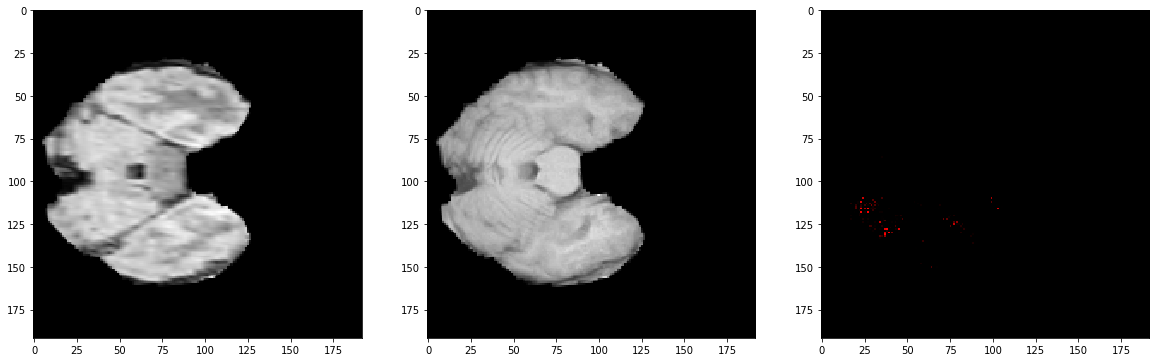


 Slice 39


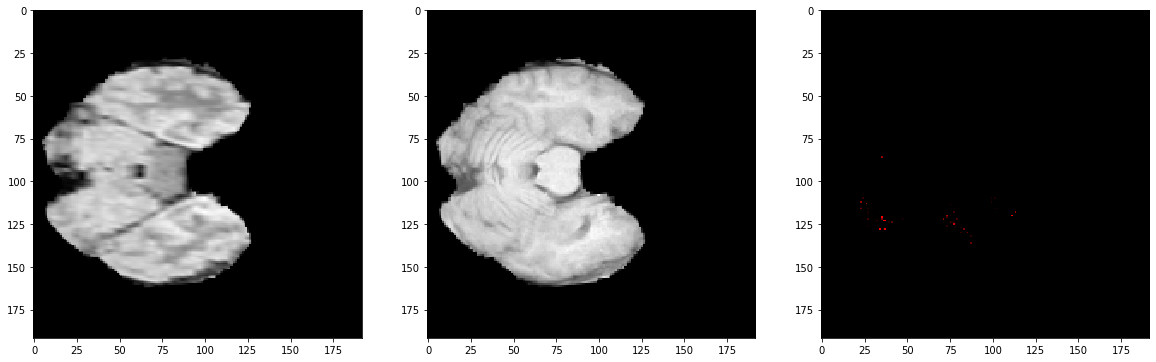


 Slice 40


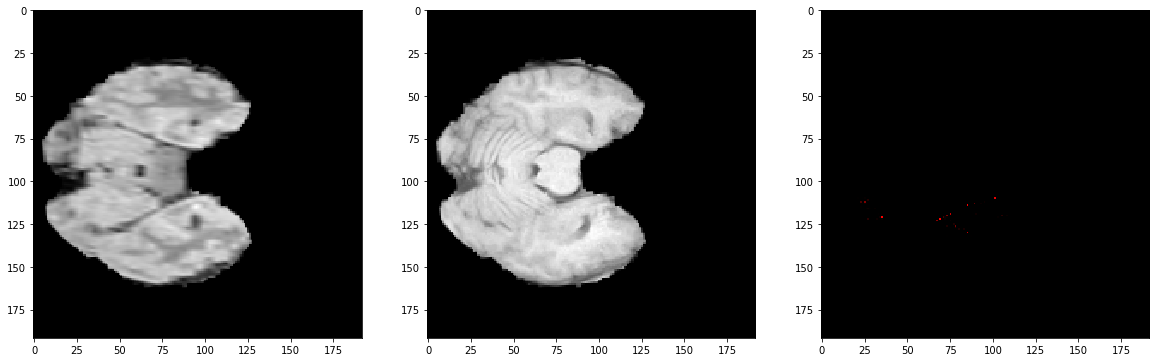


 Slice 41


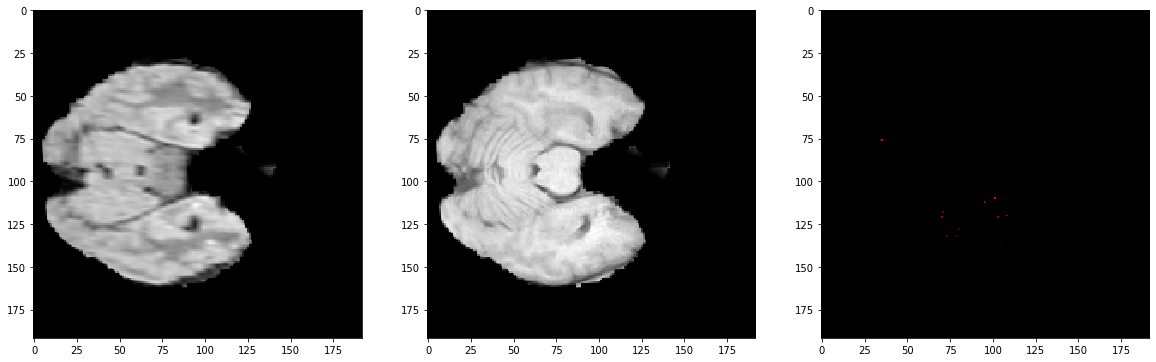


 Slice 42


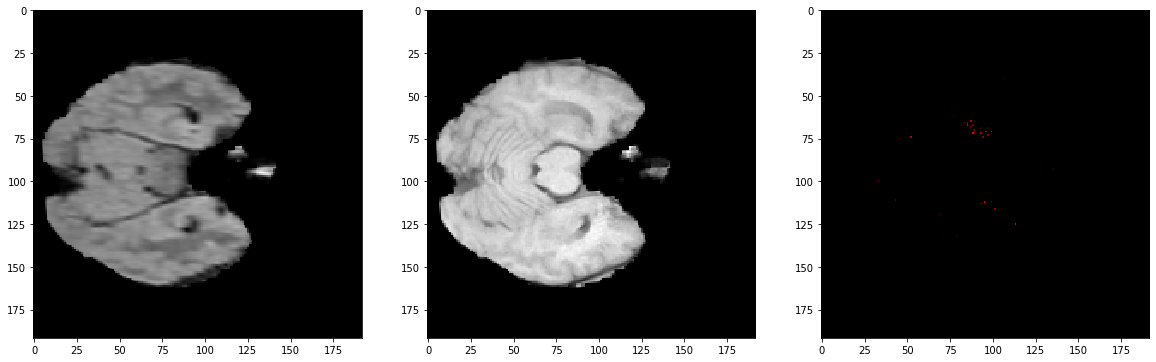


 Slice 43


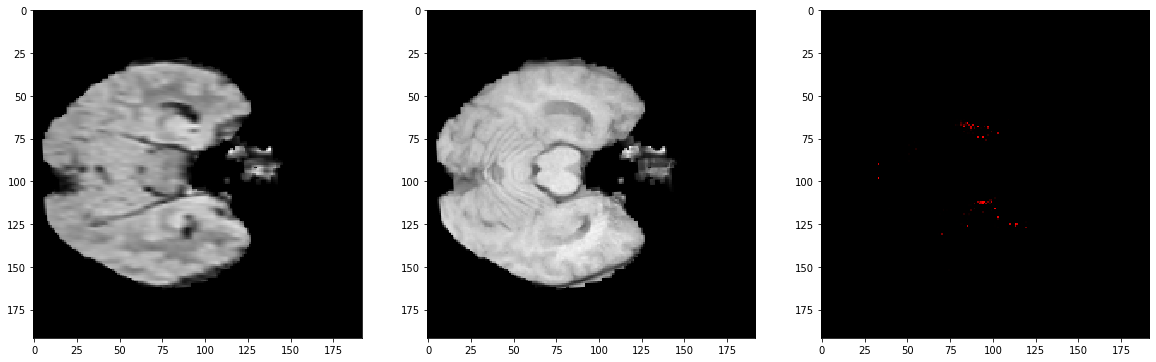


 Slice 44


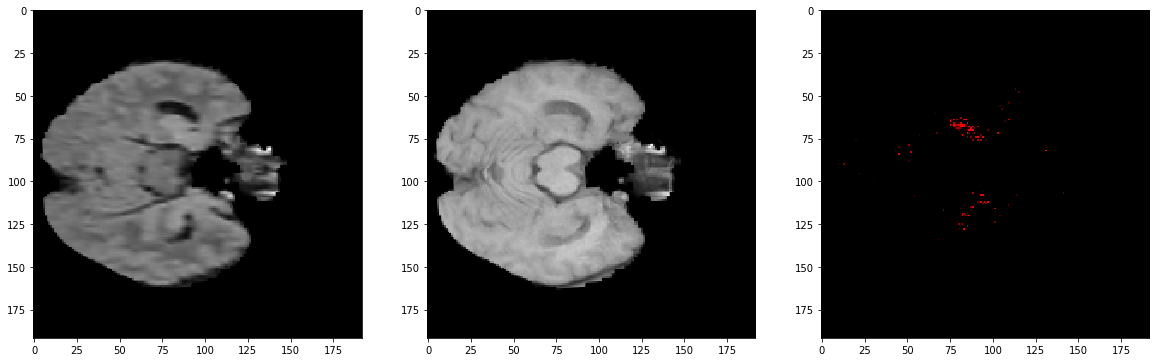


 Slice 45


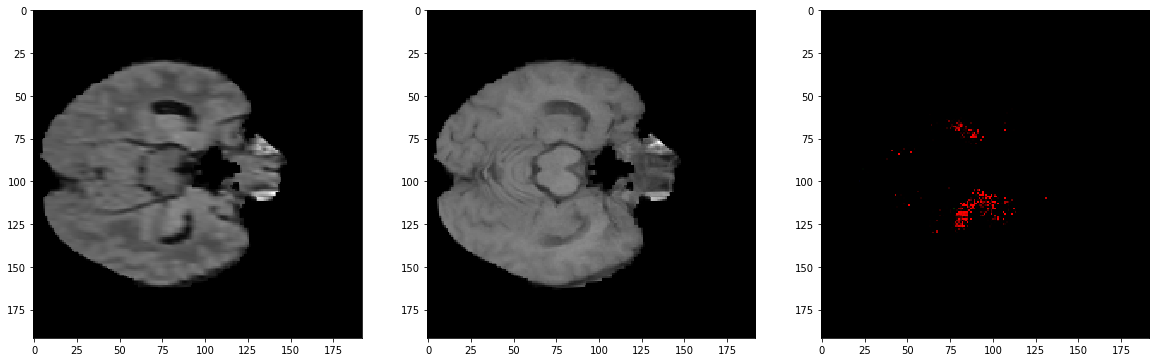


 Slice 46


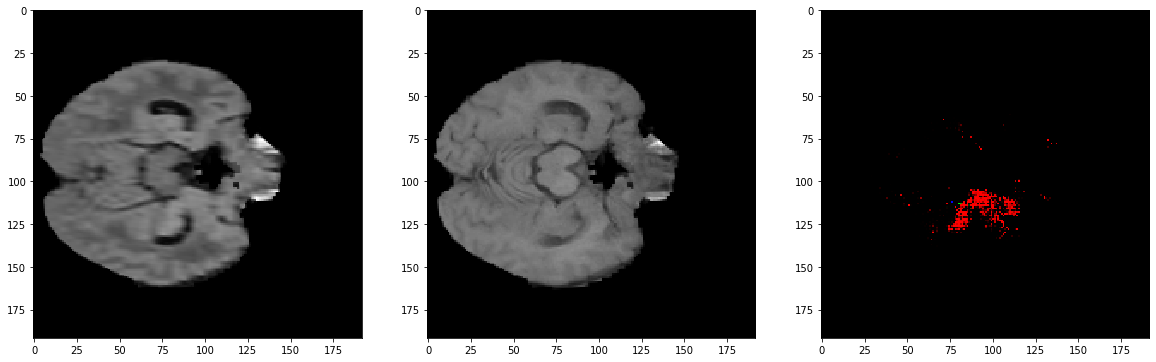


 Slice 47


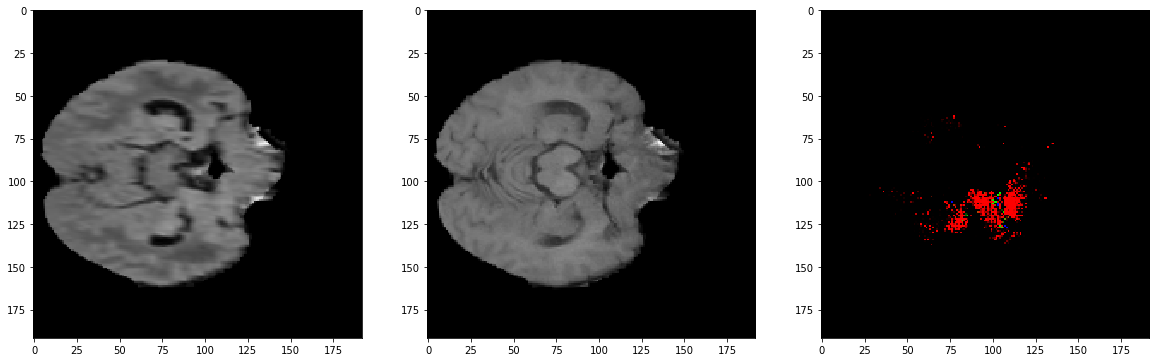


 Slice 48


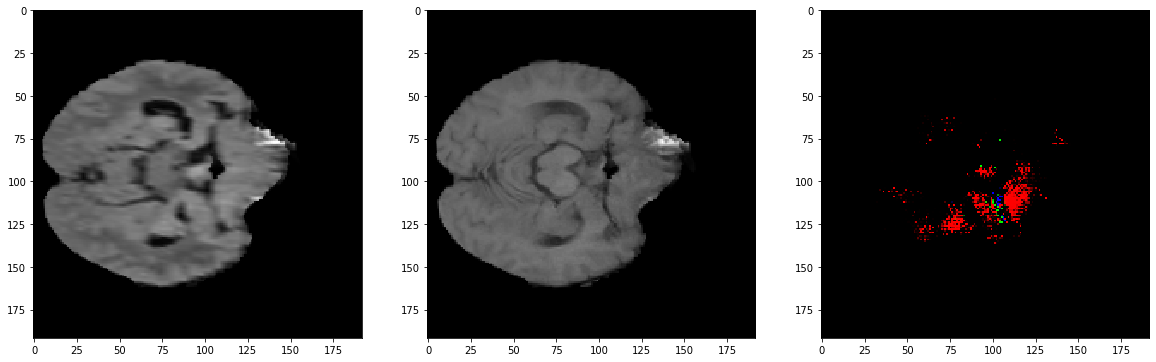


 Slice 49


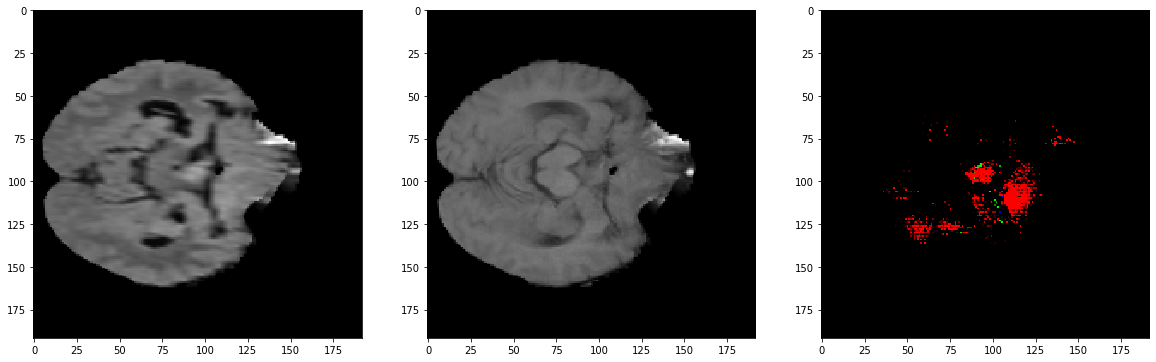


 Slice 50


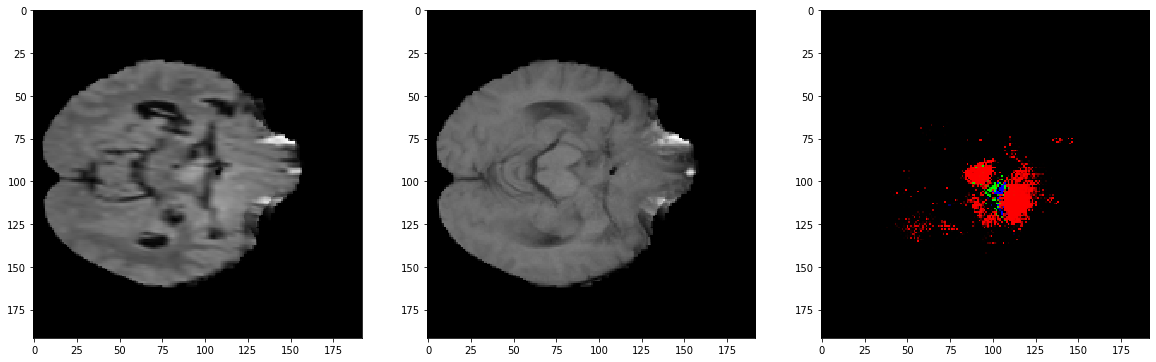


 Slice 51


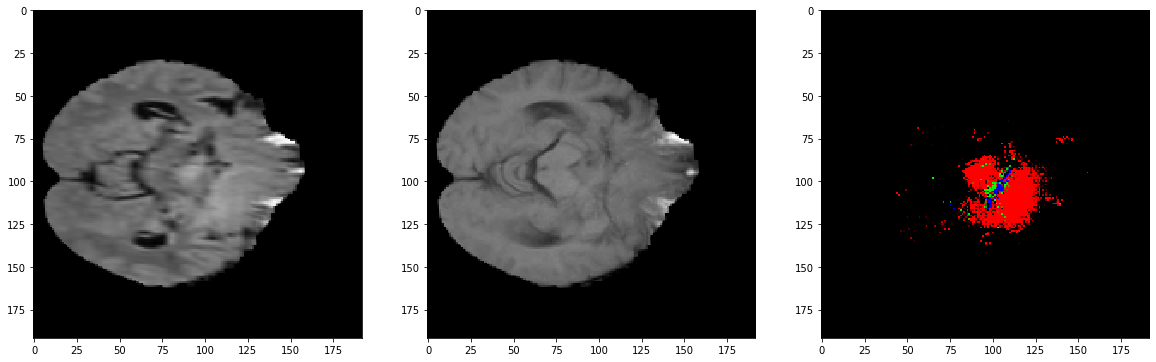


 Slice 52


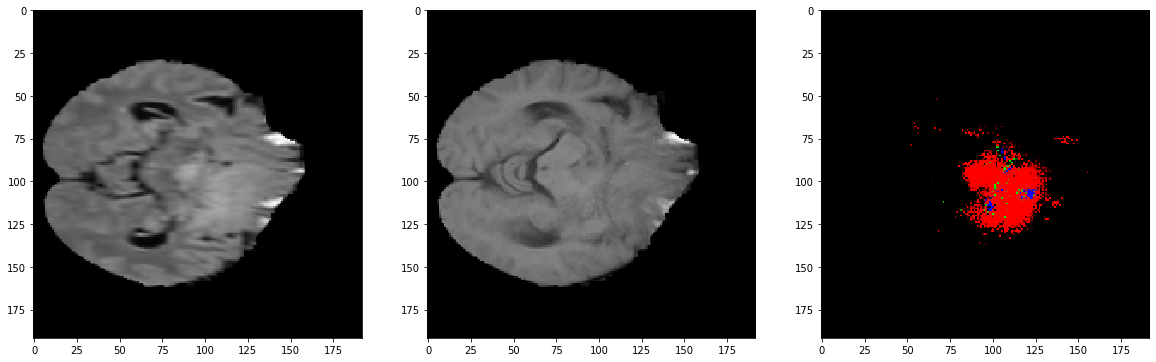


 Slice 53


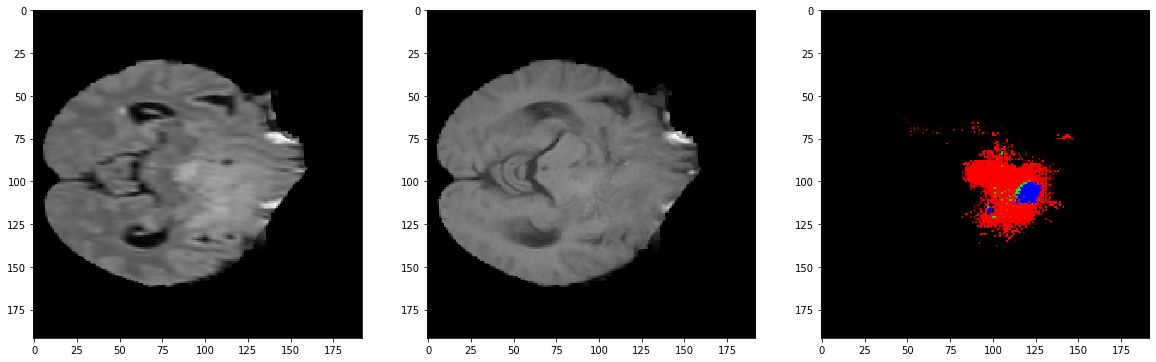


 Slice 54


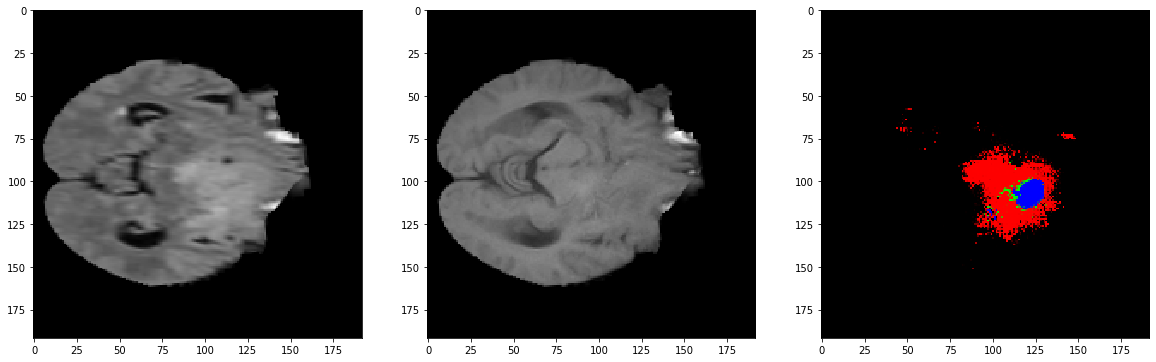


 Slice 55


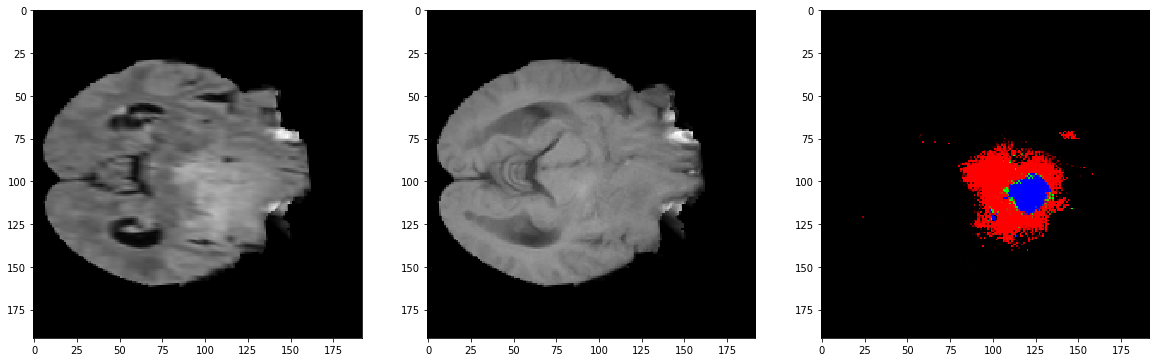


 Slice 56


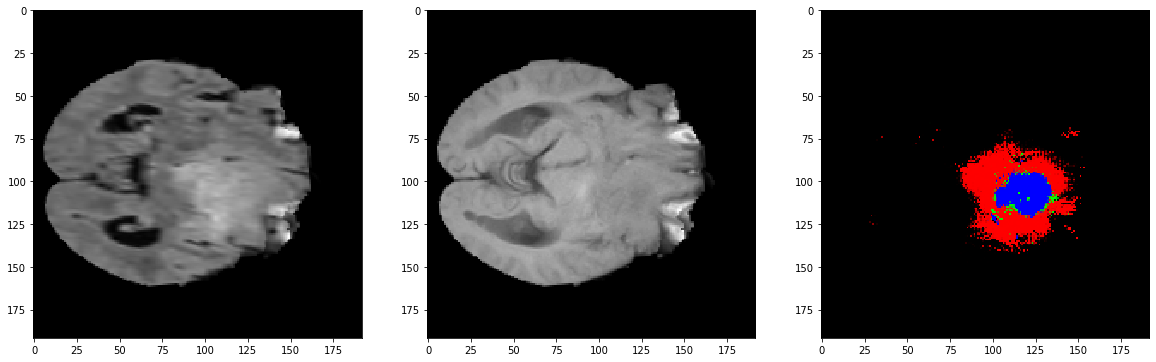


 Slice 57


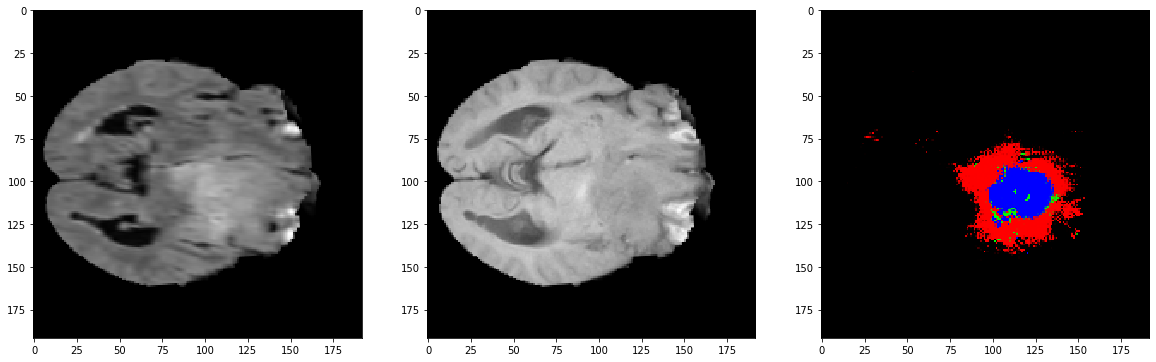


 Slice 58


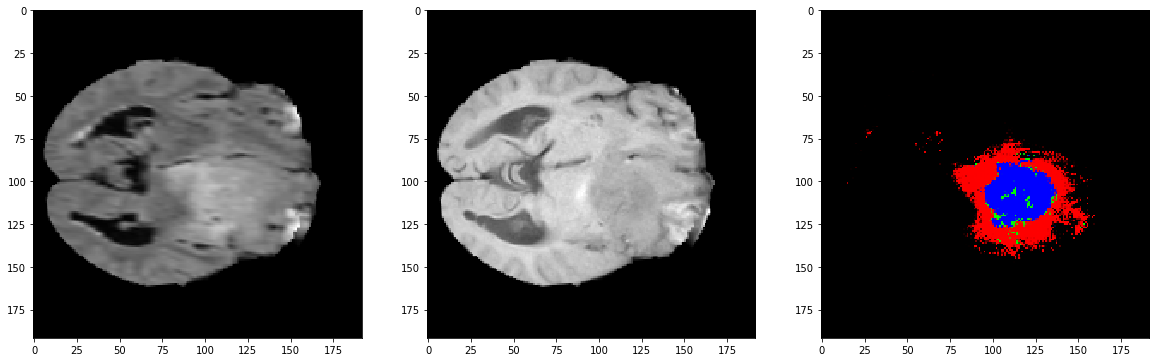


 Slice 59


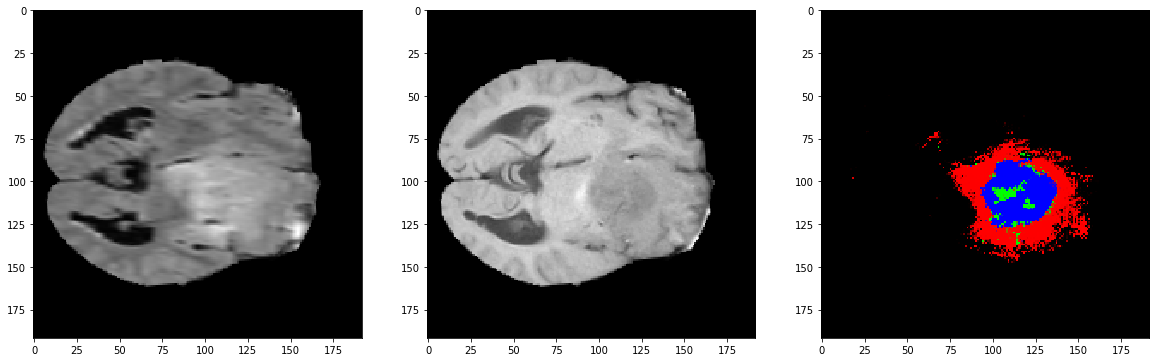


 Slice 60


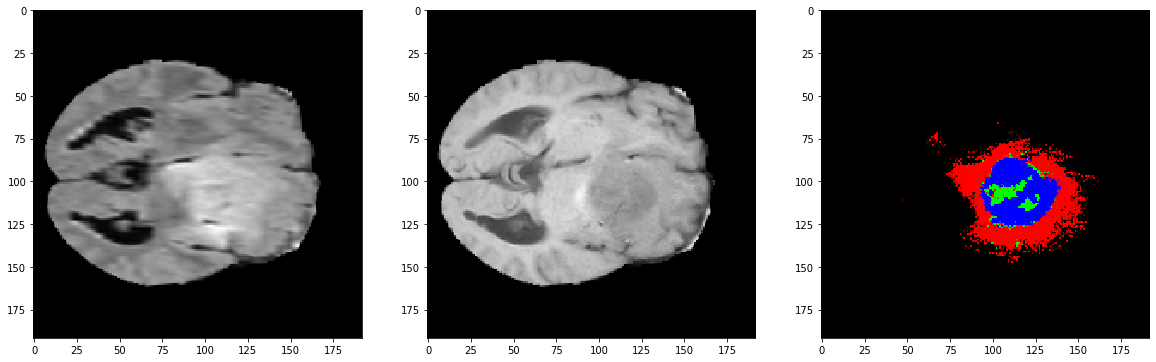


 Slice 61


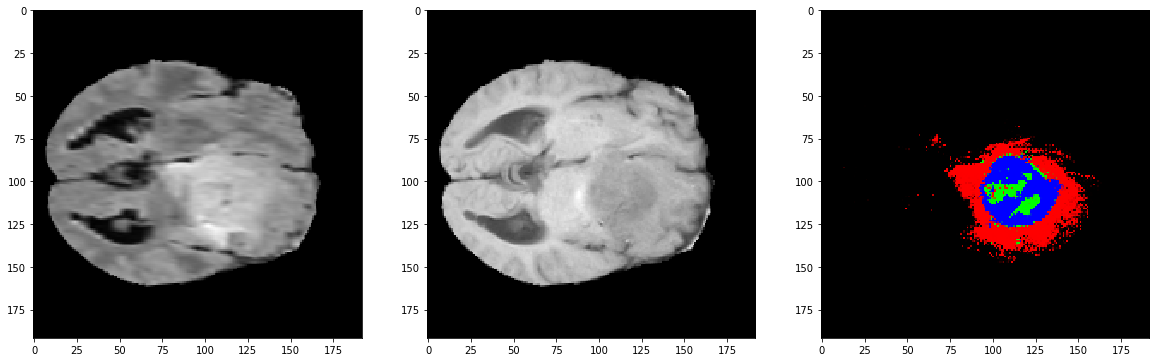


 Slice 62


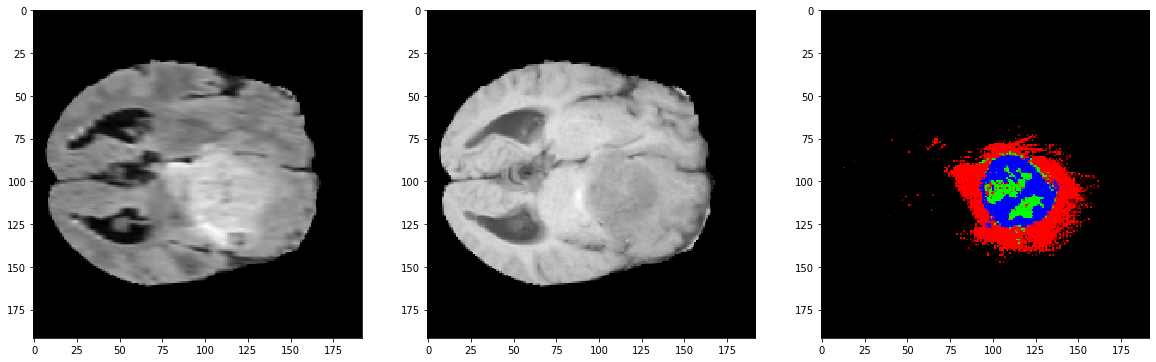


 Slice 63


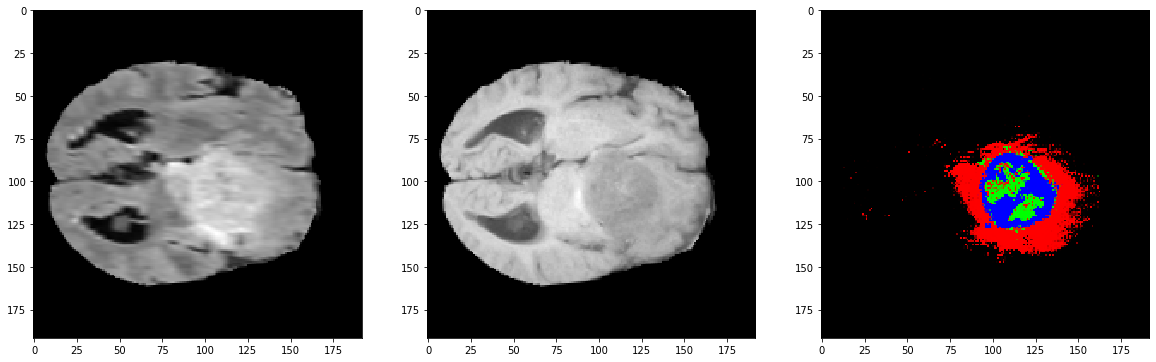


 Slice 64


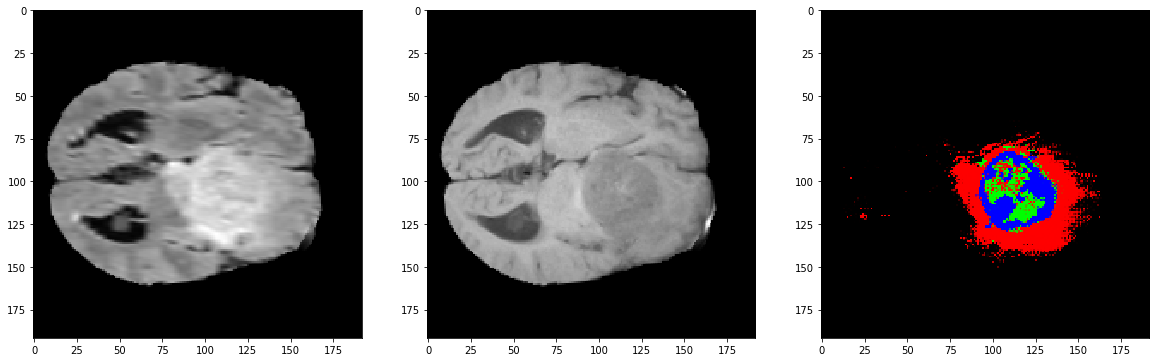


 Slice 65


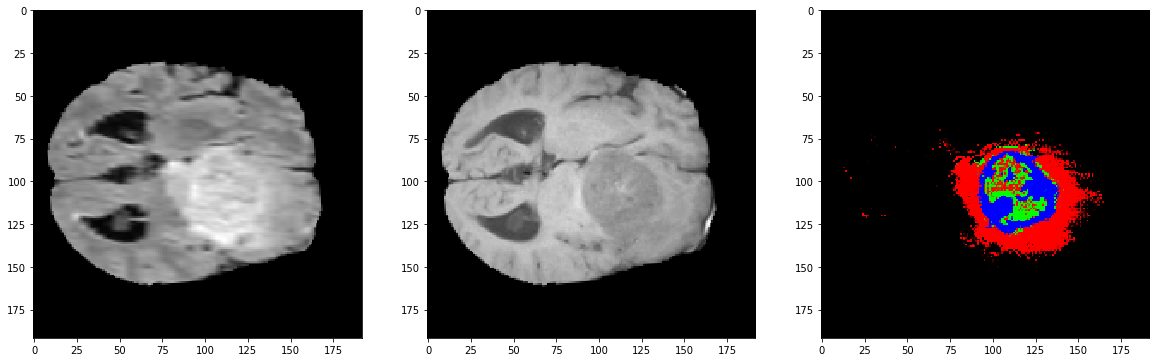


 Slice 66


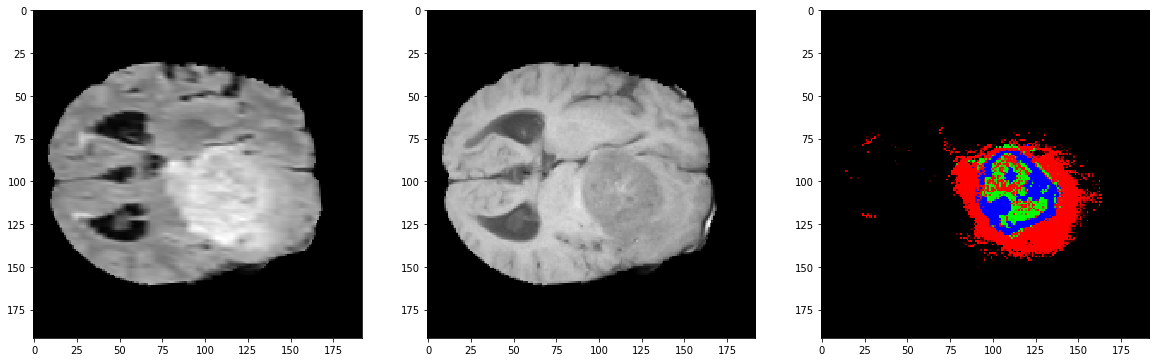


 Slice 67


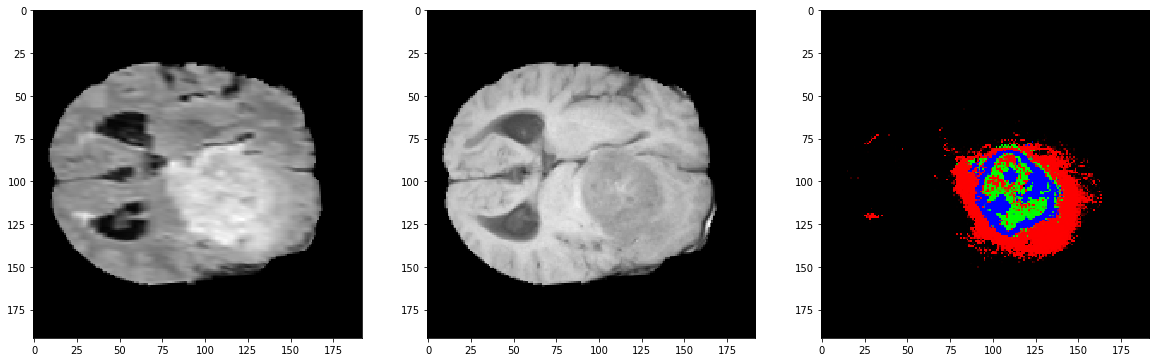


 Slice 68


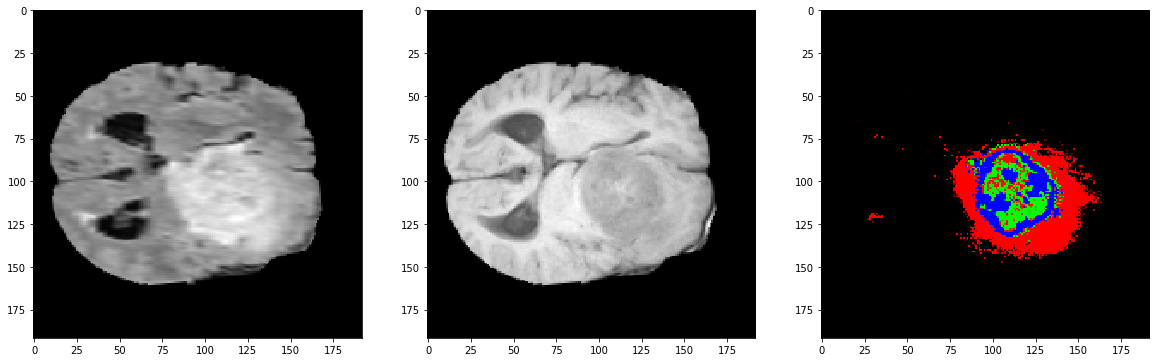


 Slice 69


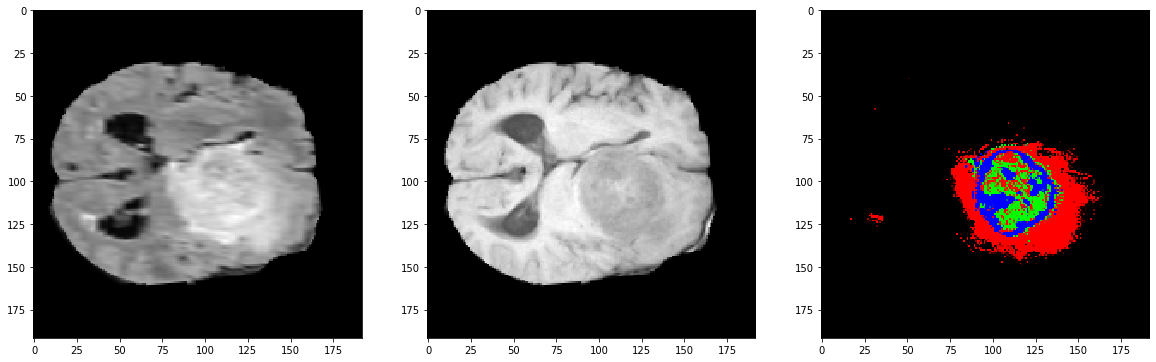


 Slice 70


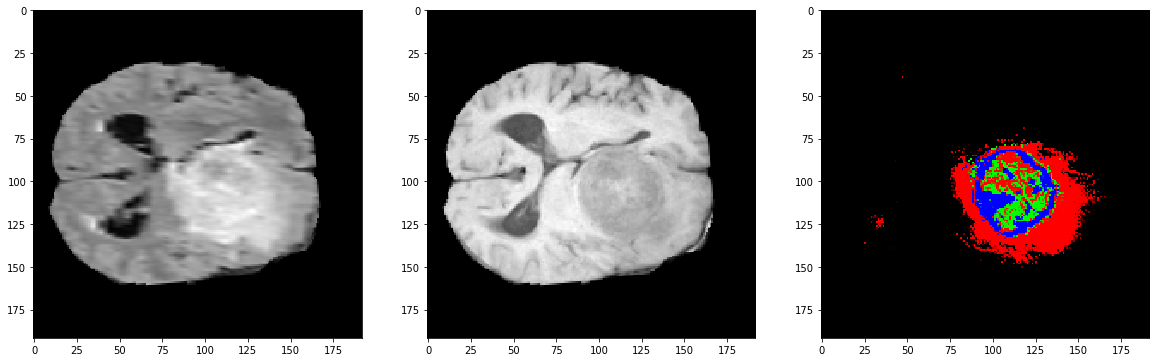


 Slice 71


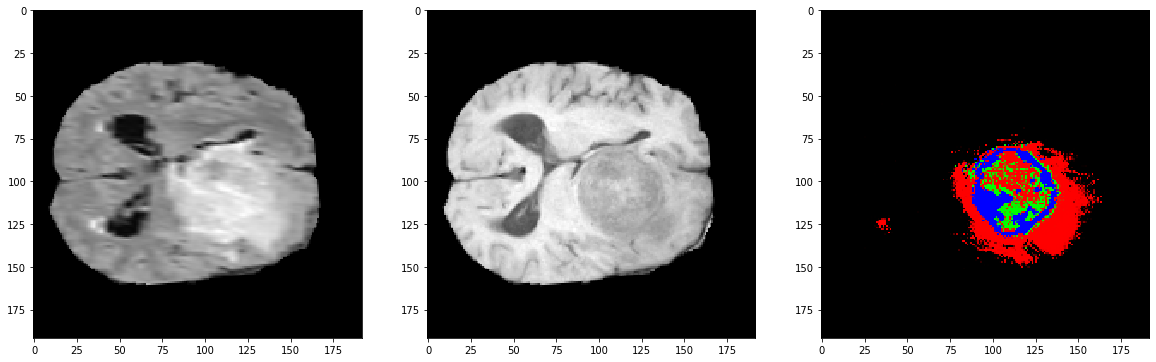


 Slice 72


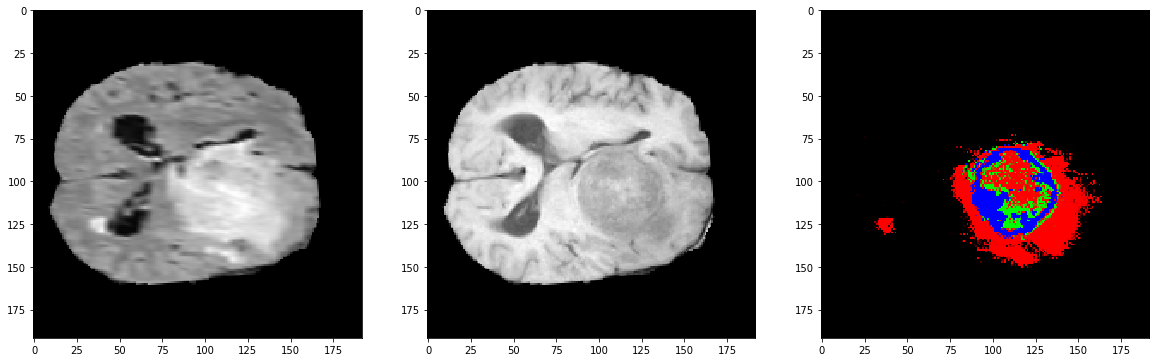


 Slice 73


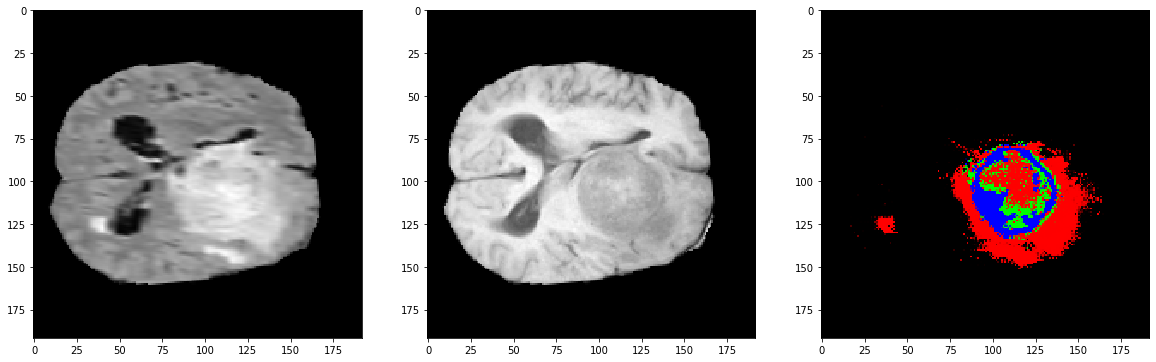


 Slice 74


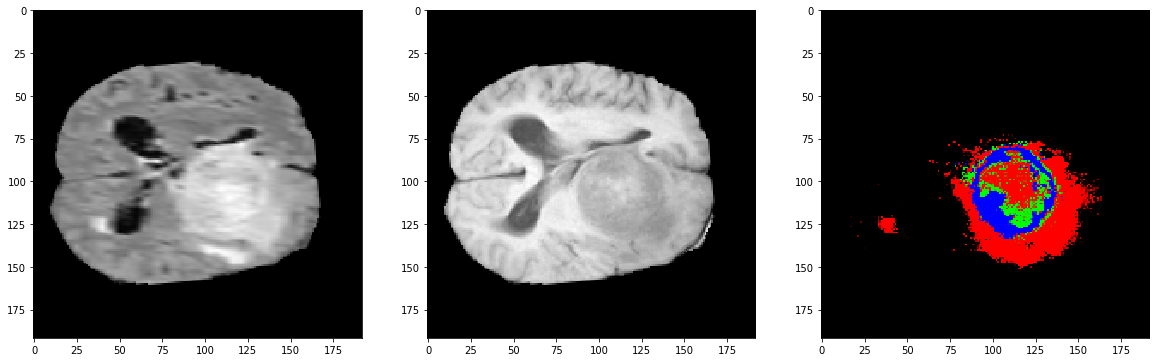


 Slice 75


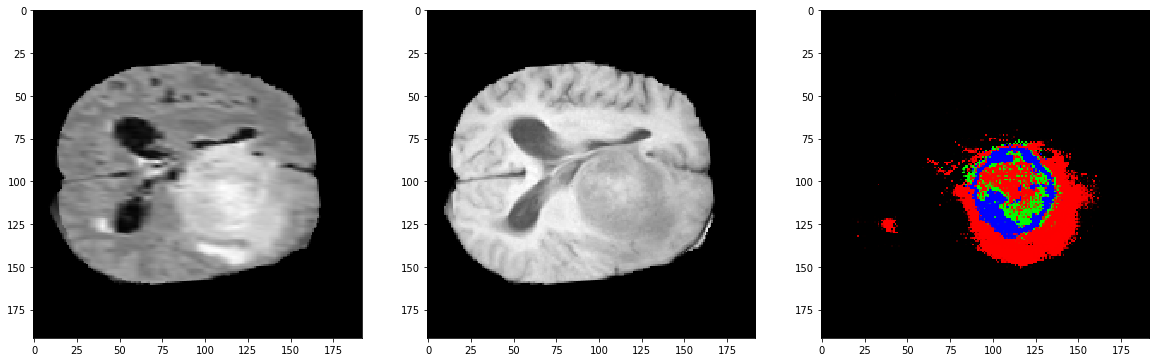


 Slice 76


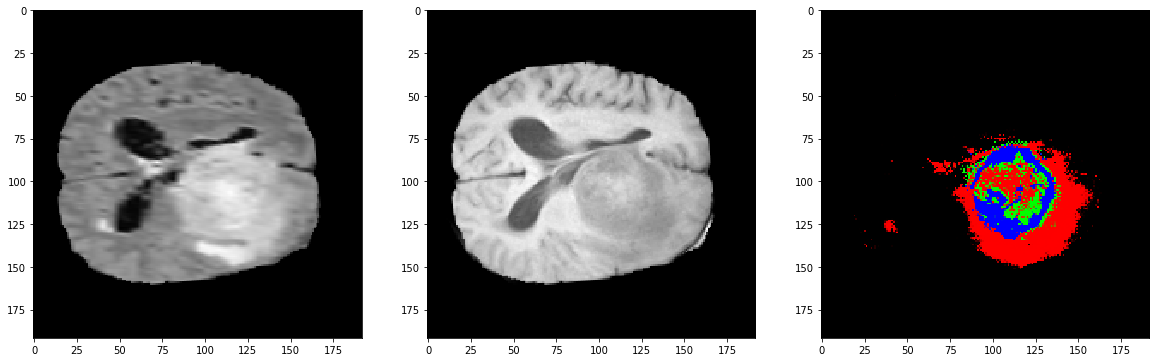


 Slice 77


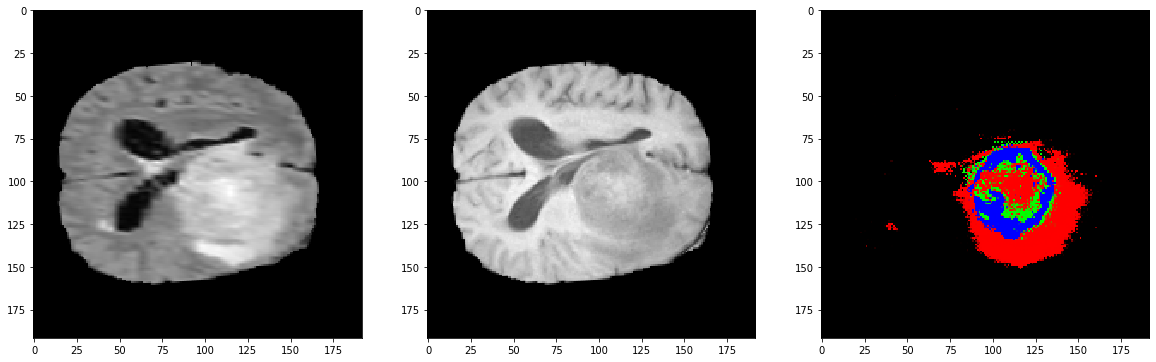


 Slice 78


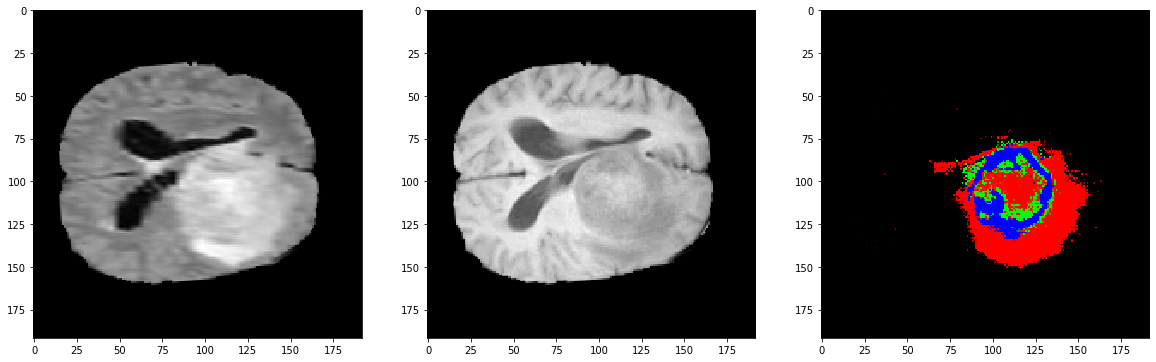


 Slice 79


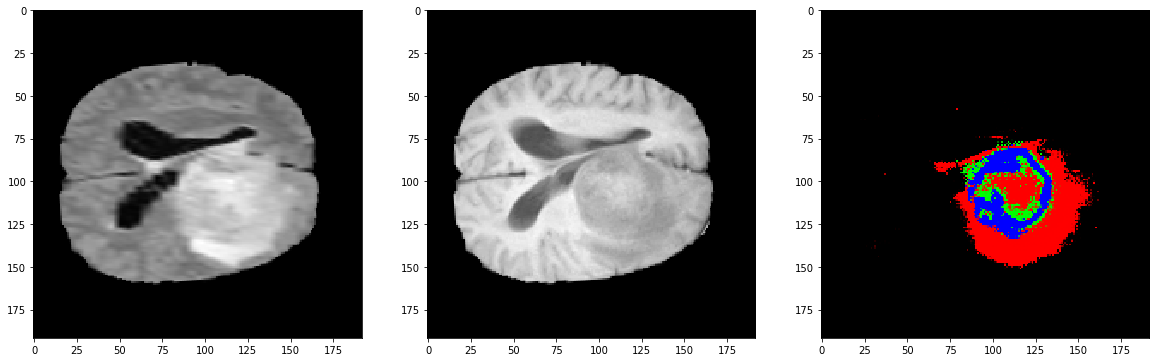


 Slice 80


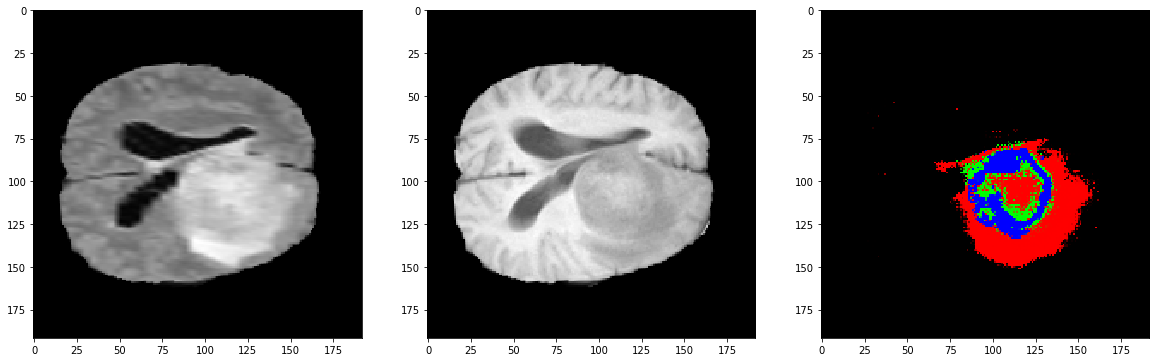


 Slice 81


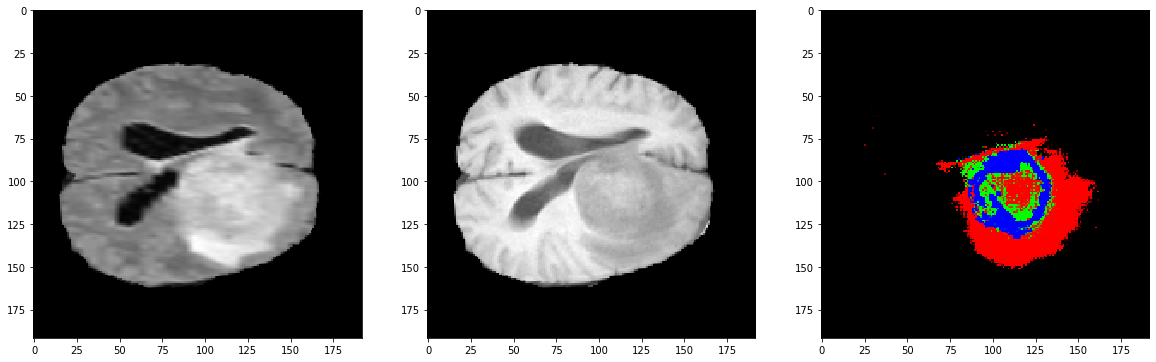


 Slice 82


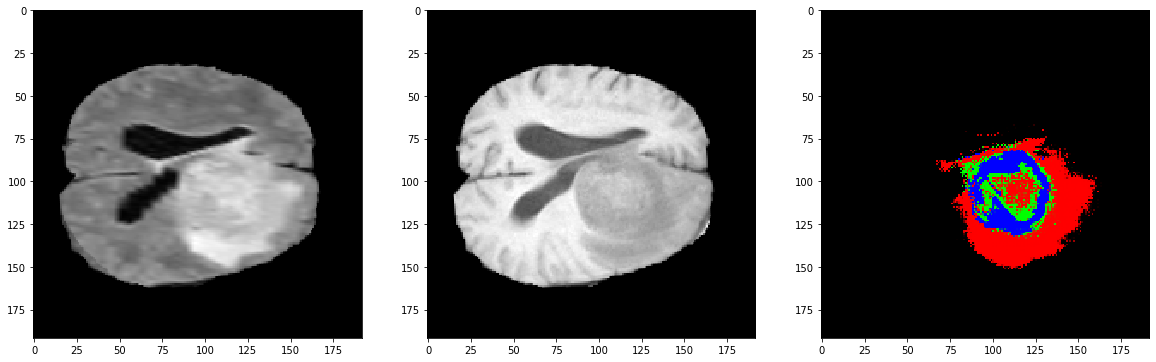


 Slice 83


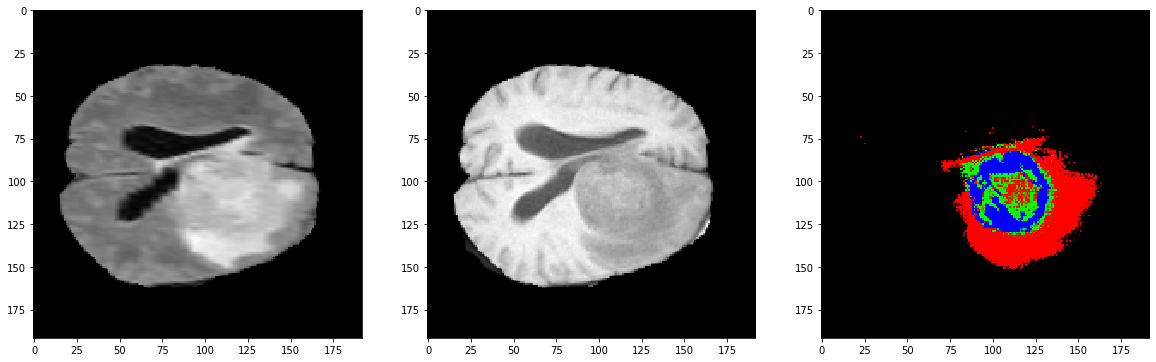


 Slice 84


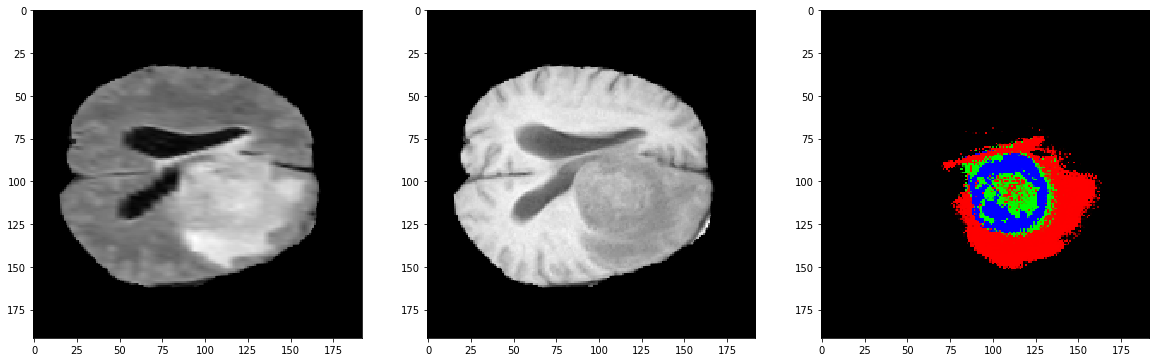


 Slice 85


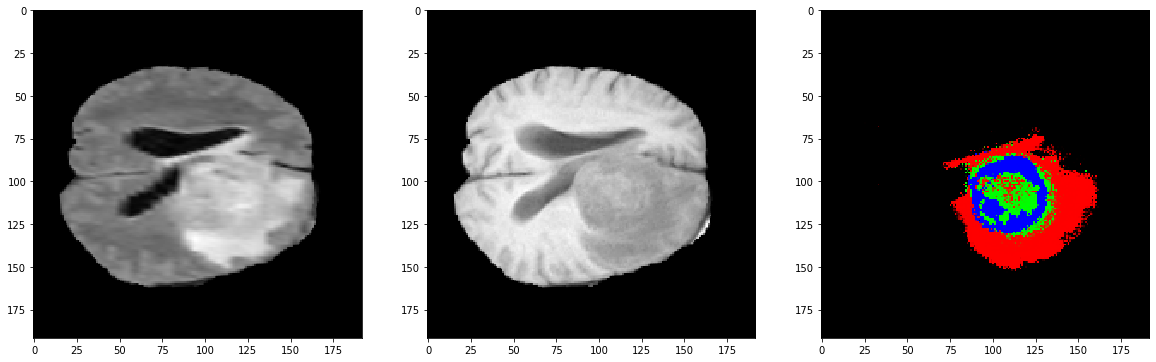


 Slice 86


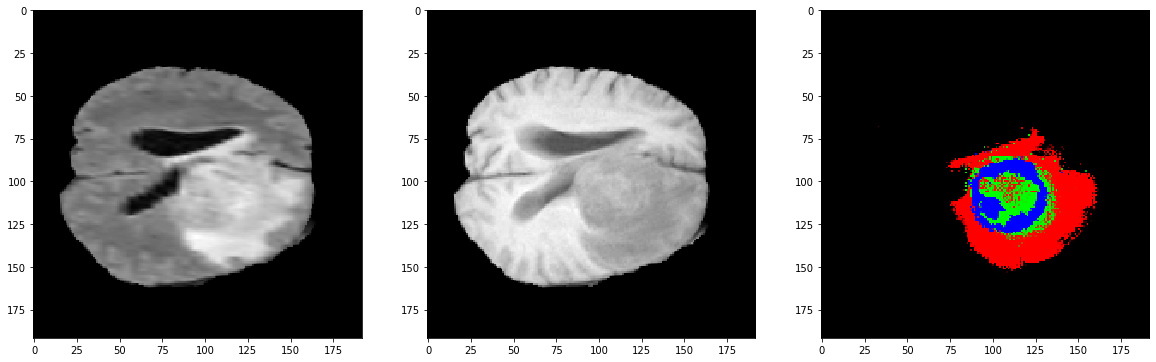


 Slice 87


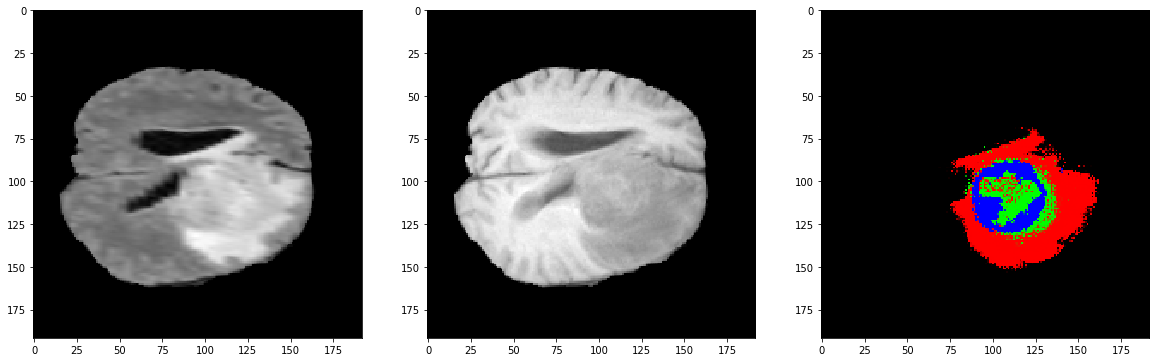


 Slice 88


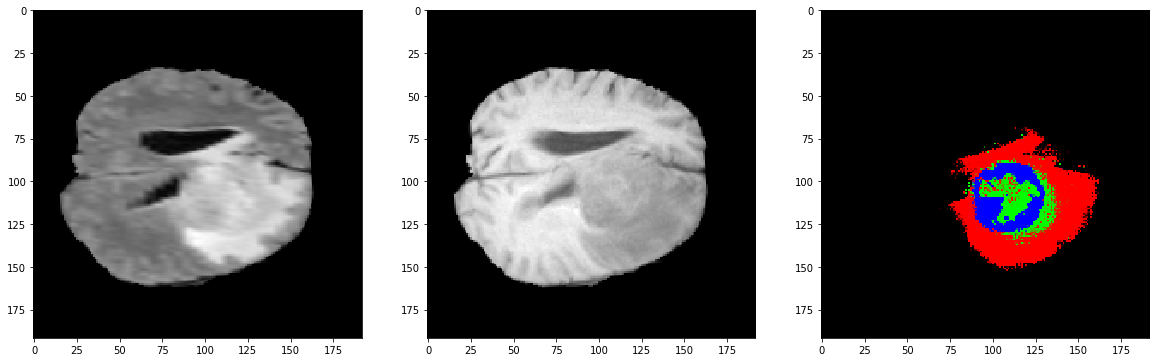


 Slice 89


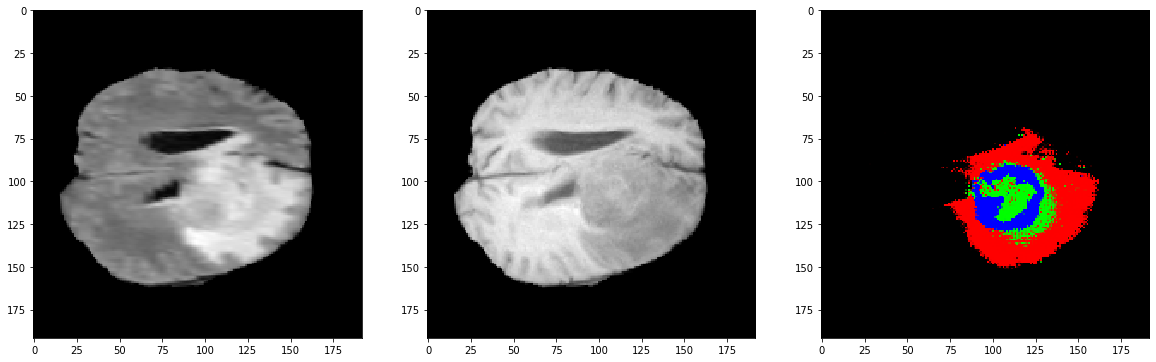


 Slice 90


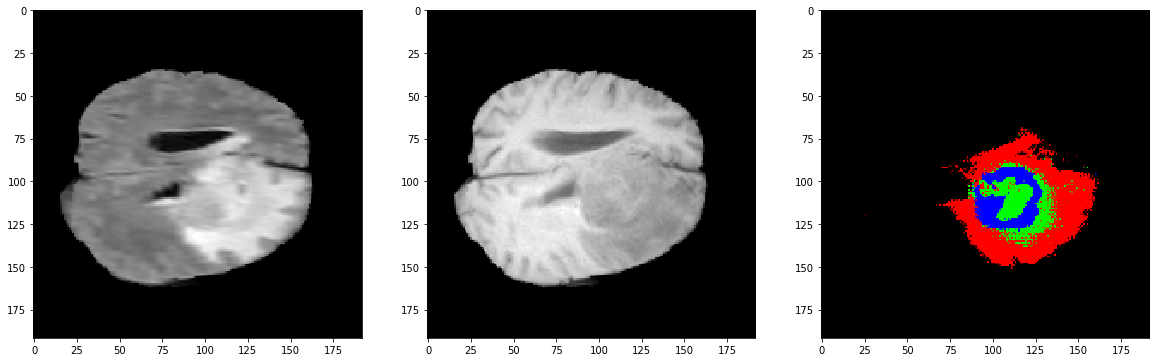


 Slice 91


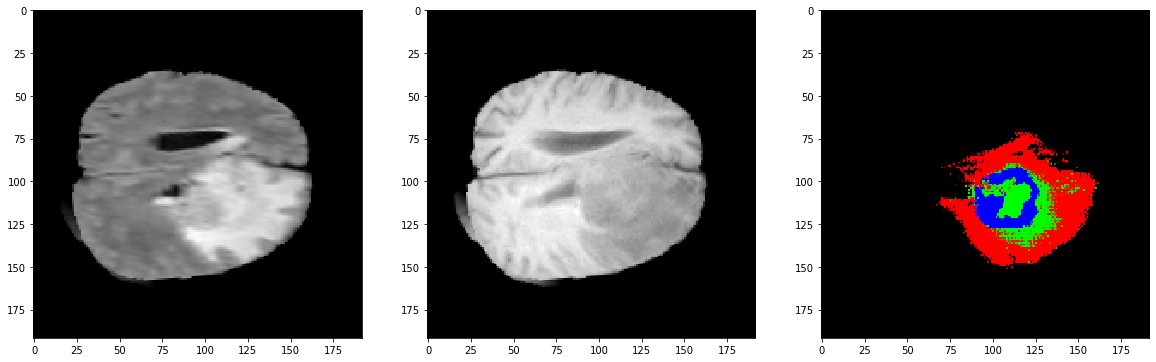


 Slice 92


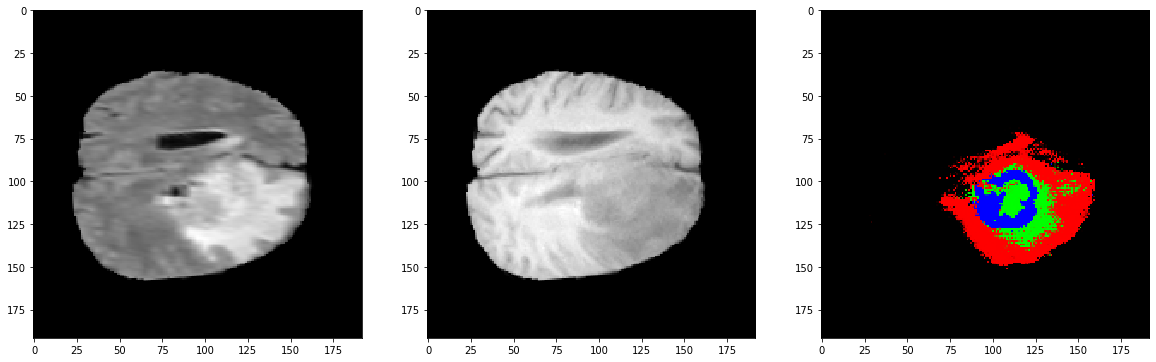


 Slice 93


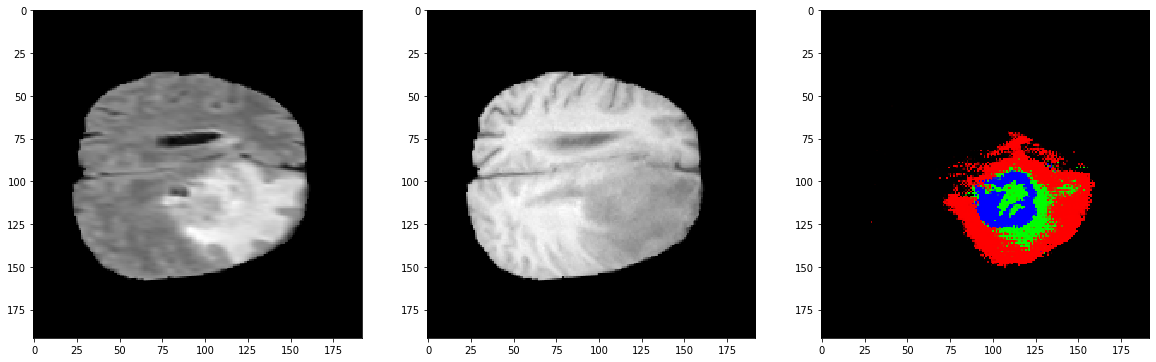


 Slice 94


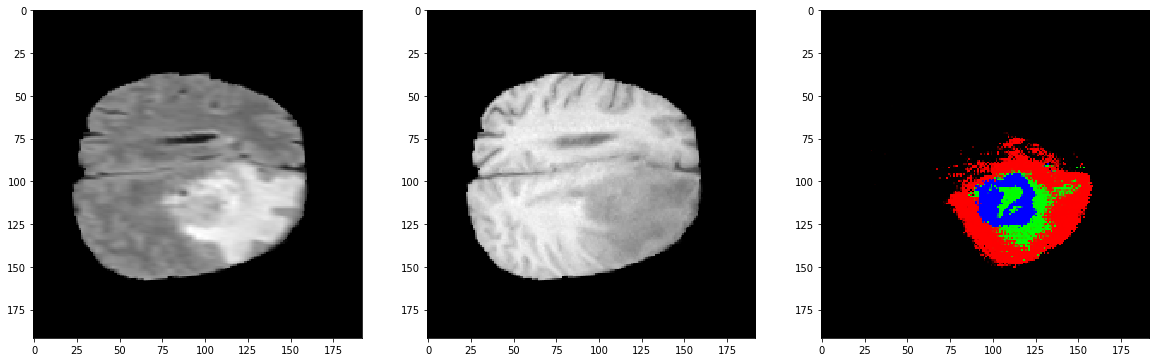


 Slice 95


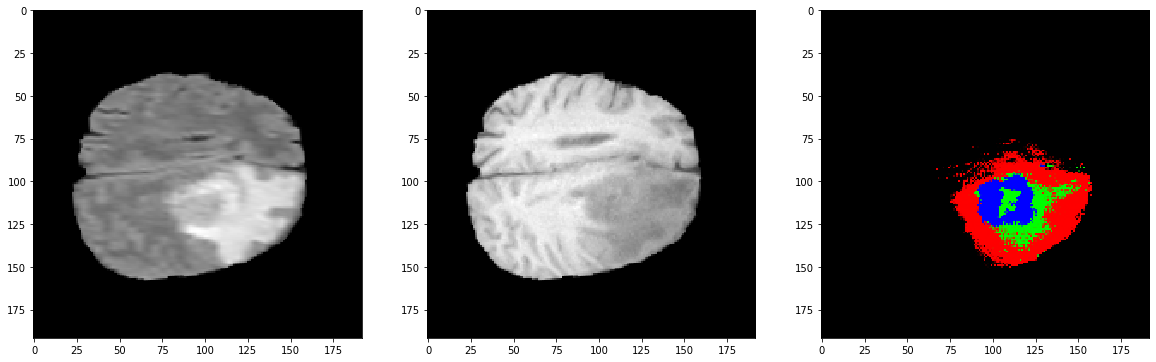


 Slice 96


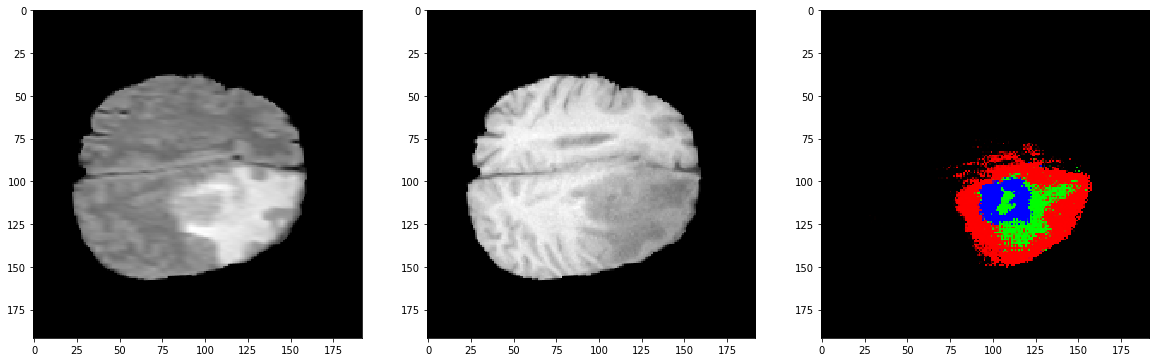


 Slice 97


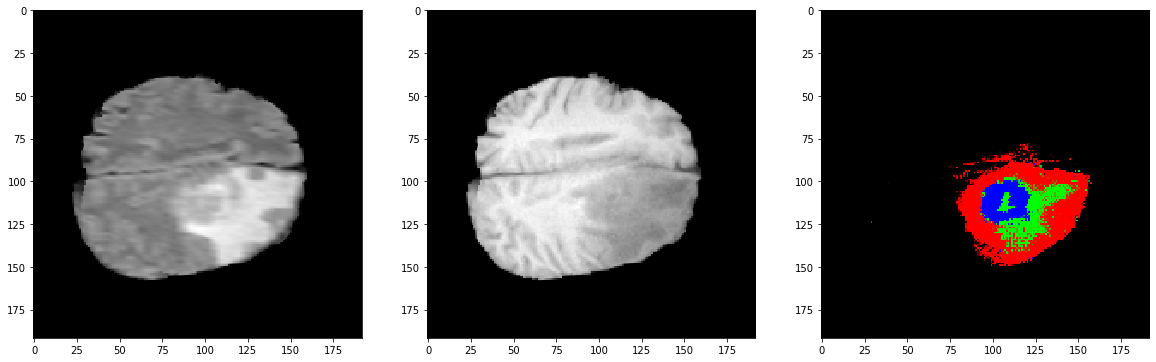


 Slice 98


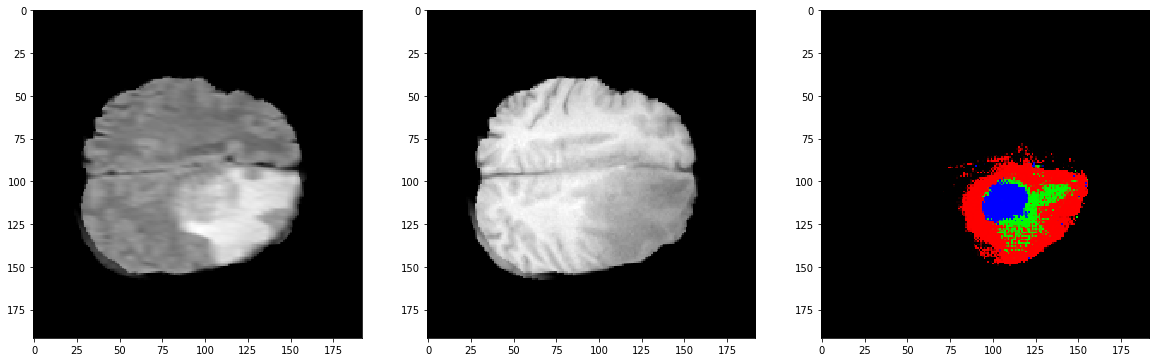


 Slice 99


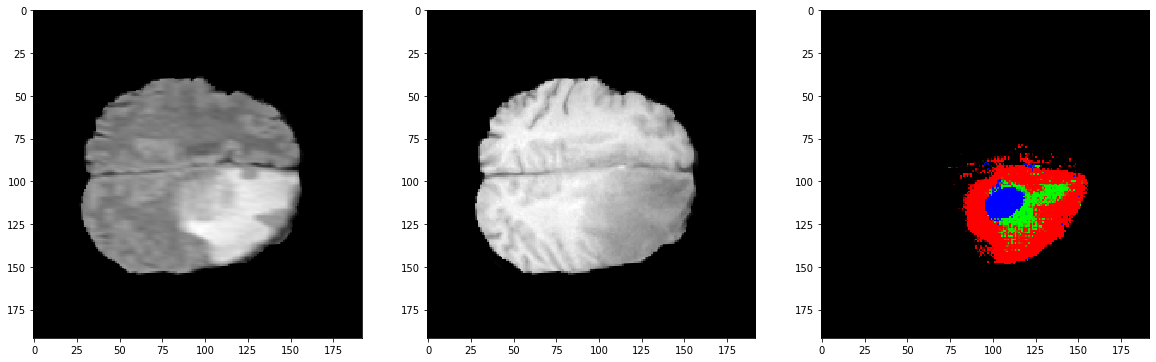


 Slice 100


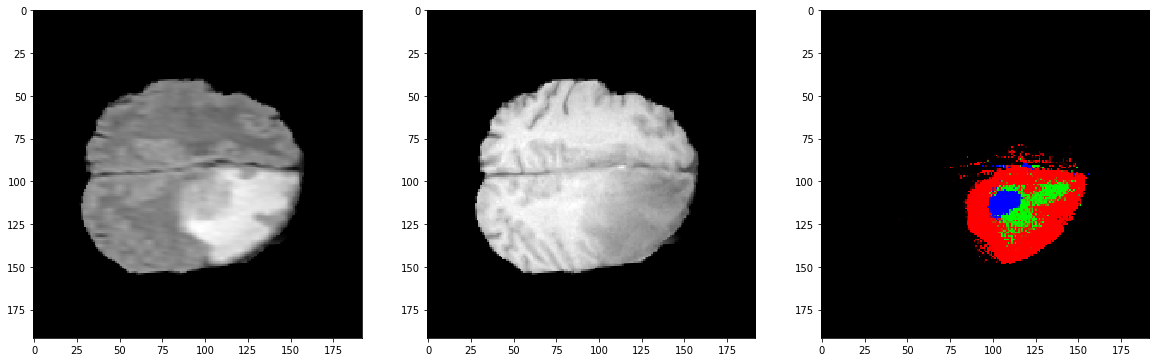


 Slice 101


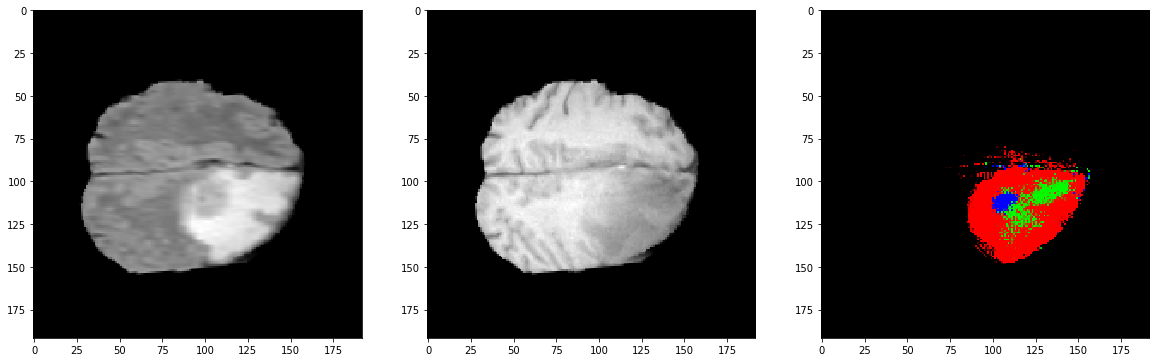


 Slice 102


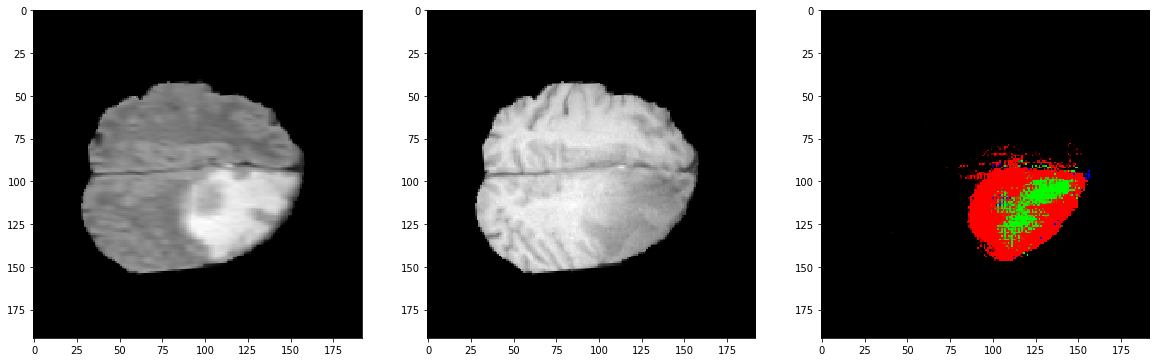


 Slice 103


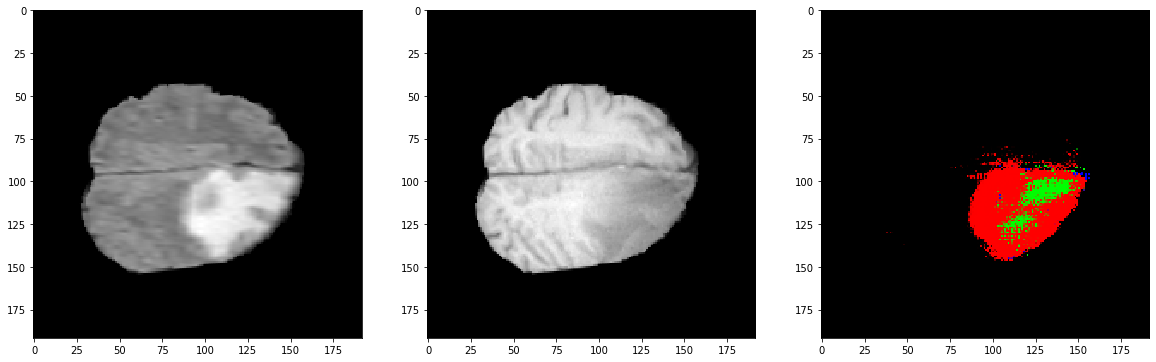


 Slice 104


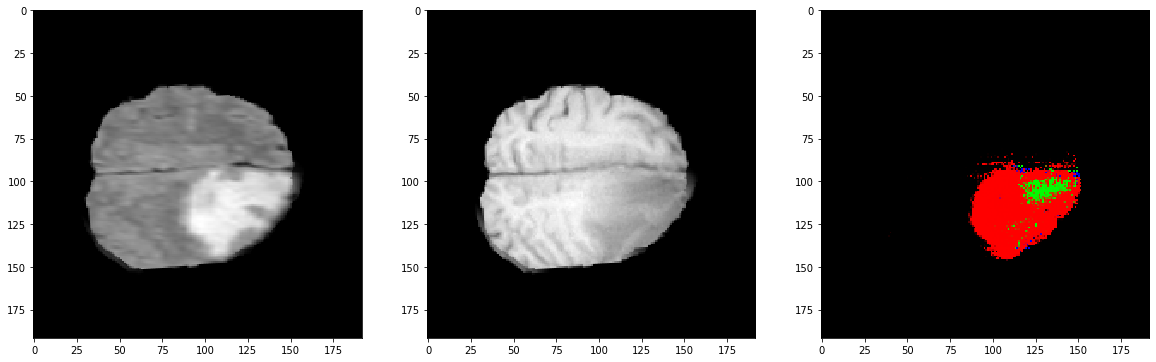


 Slice 105


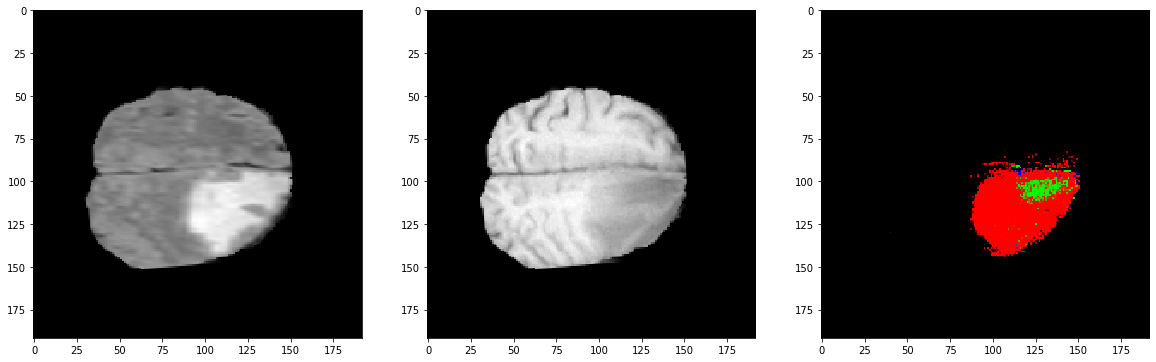


 Slice 106


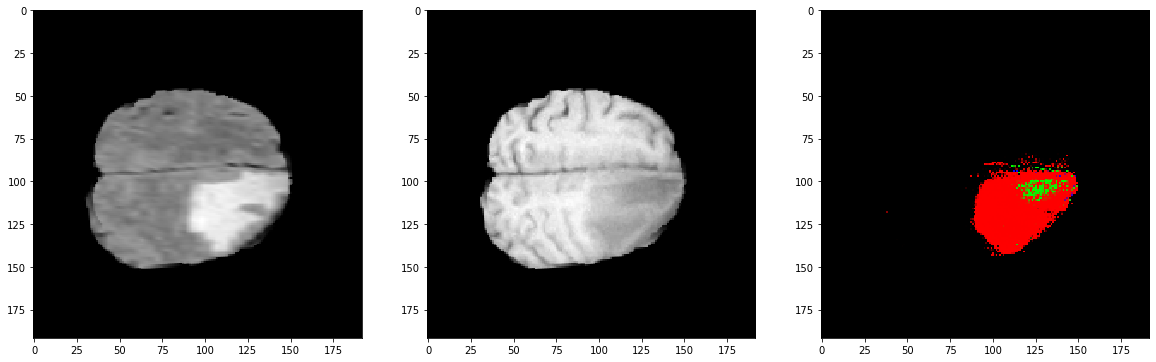


 Slice 107


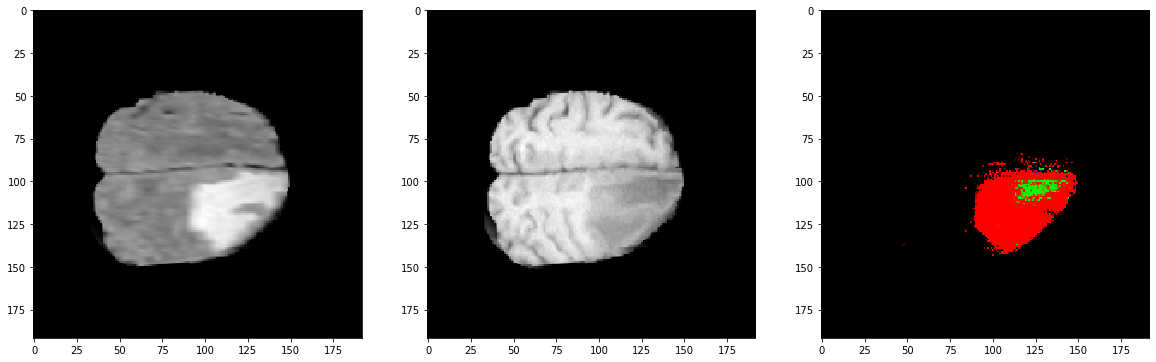


 Slice 108


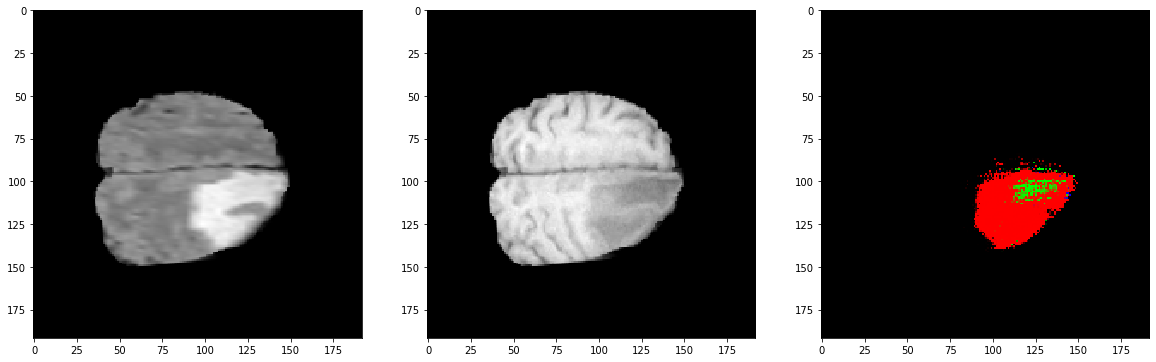


 Slice 109


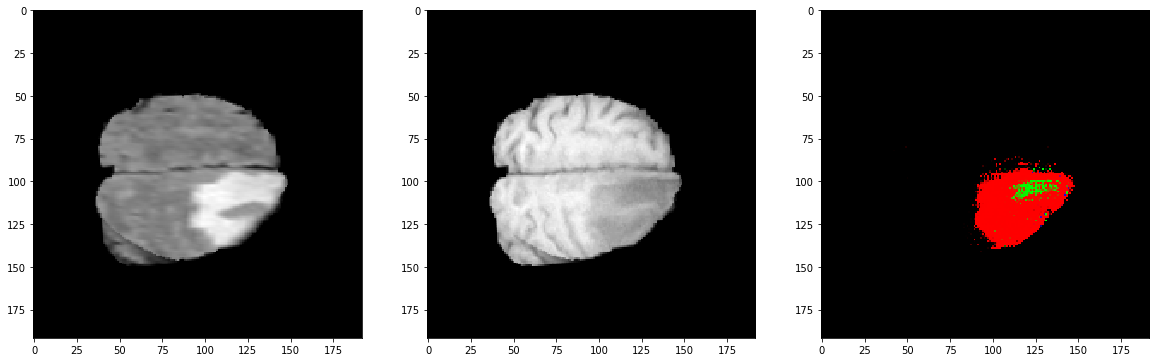


 Slice 110


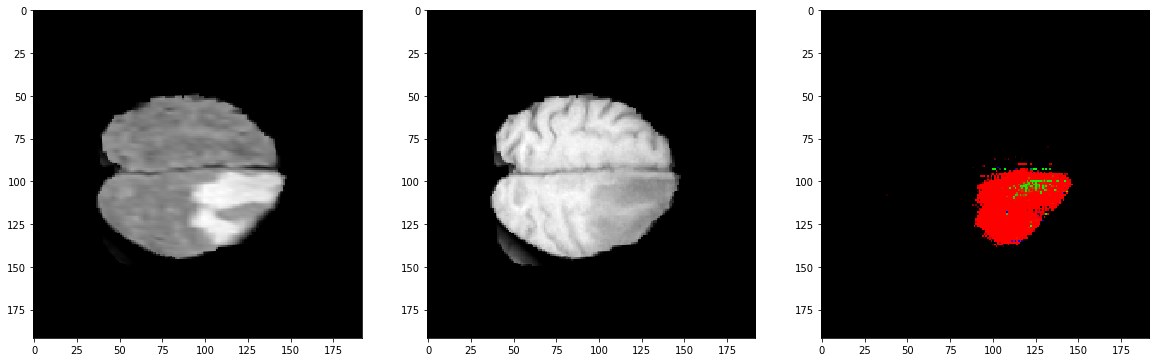


 Slice 111


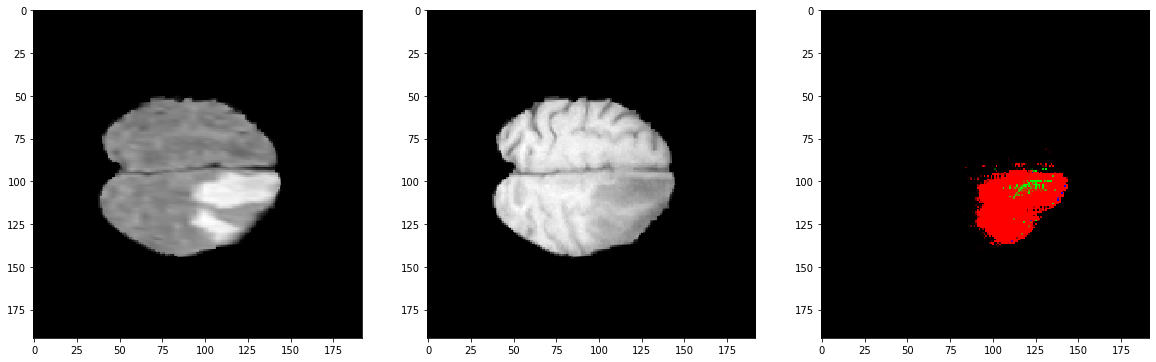


 Slice 112


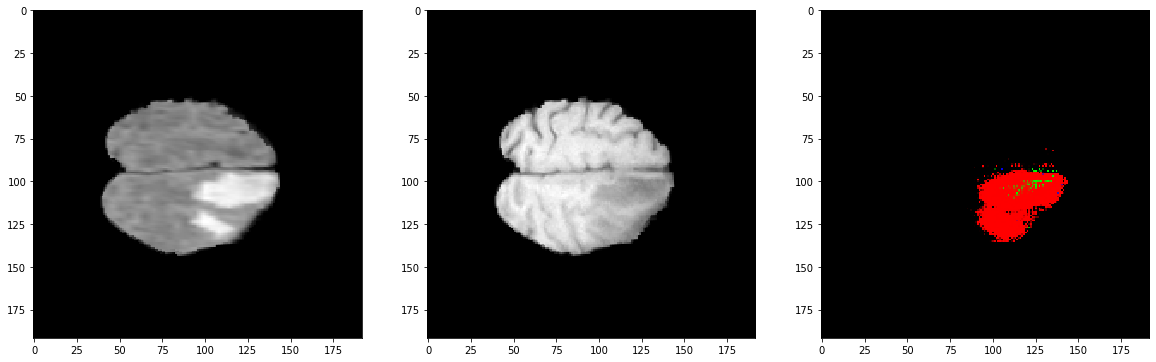


 Slice 113


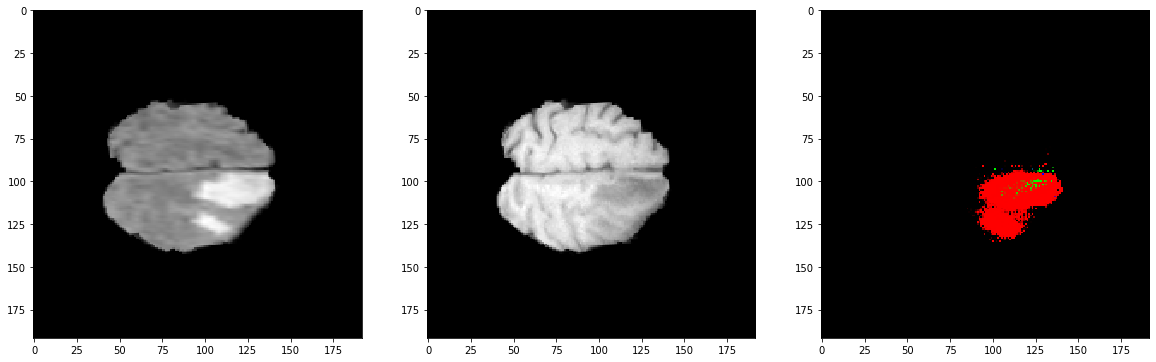


 Slice 114


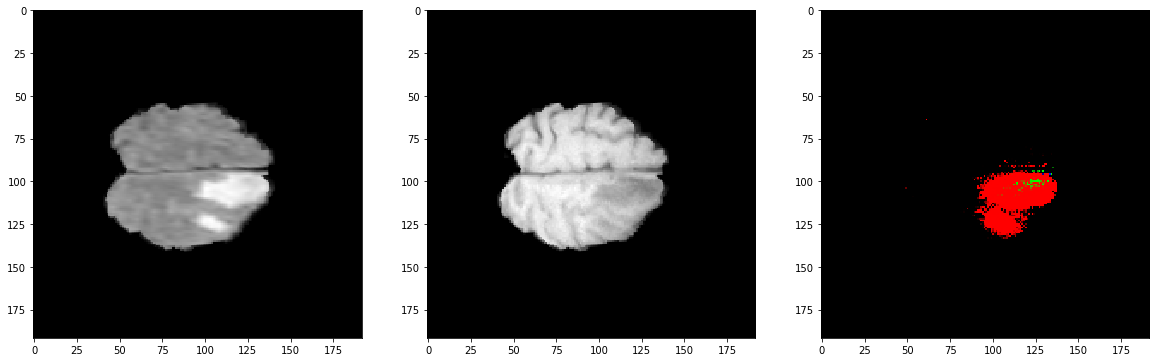


 Slice 115


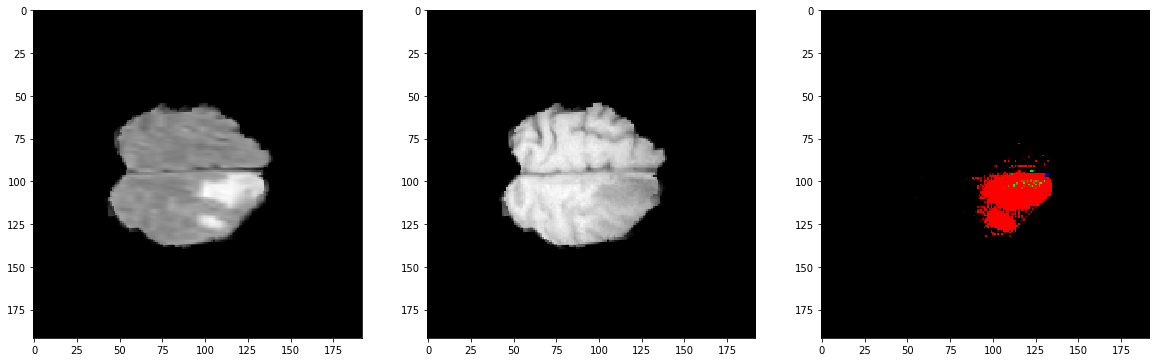


 Slice 116


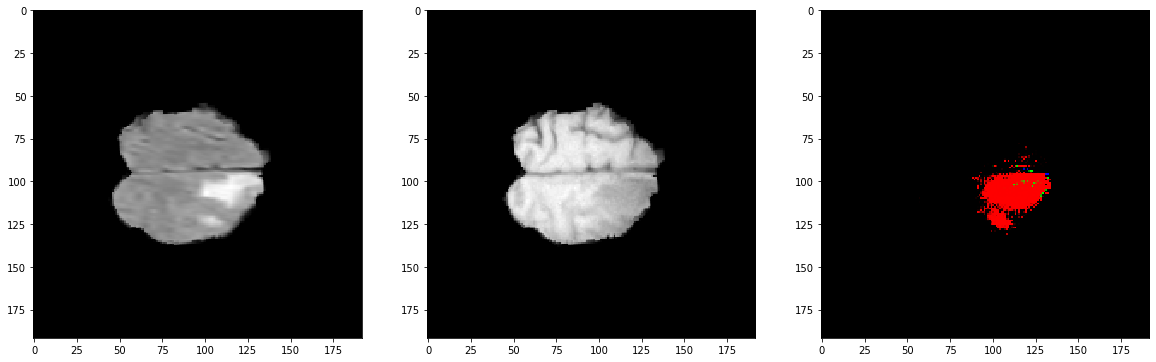


 Slice 117


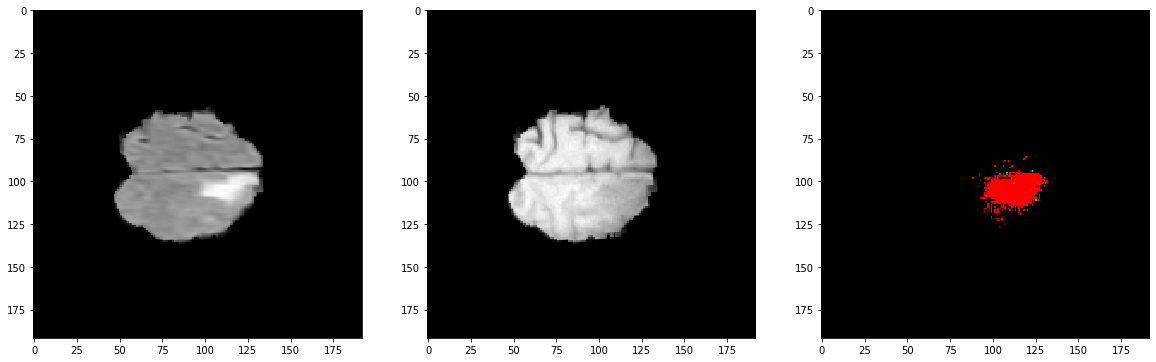


 Slice 118


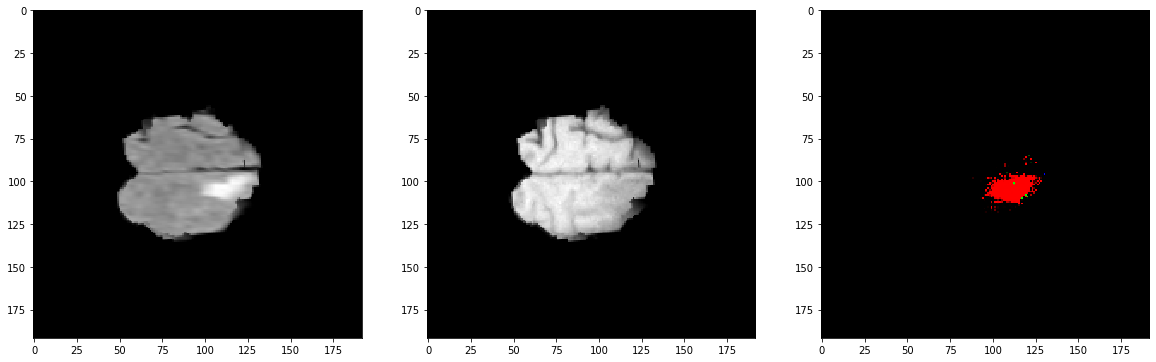


 Slice 119


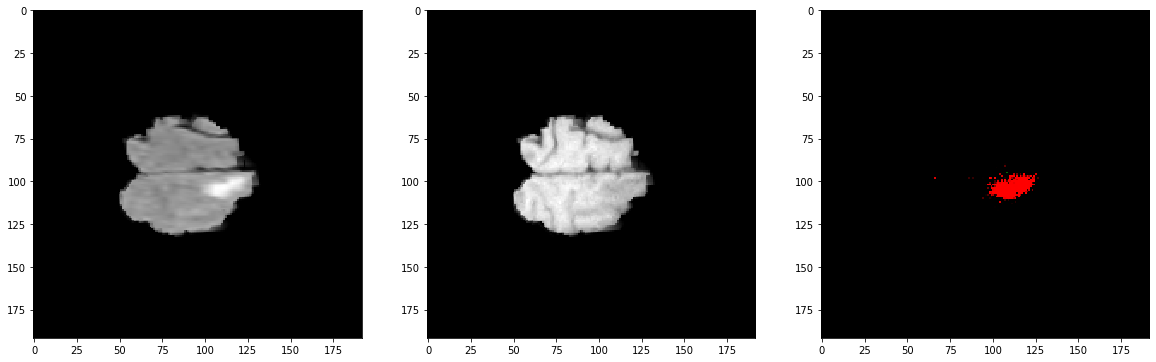


 Slice 120


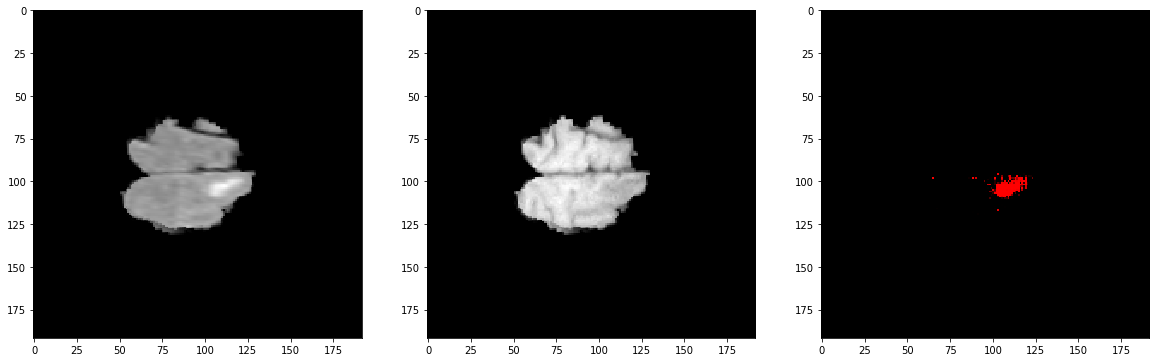


 Slice 121


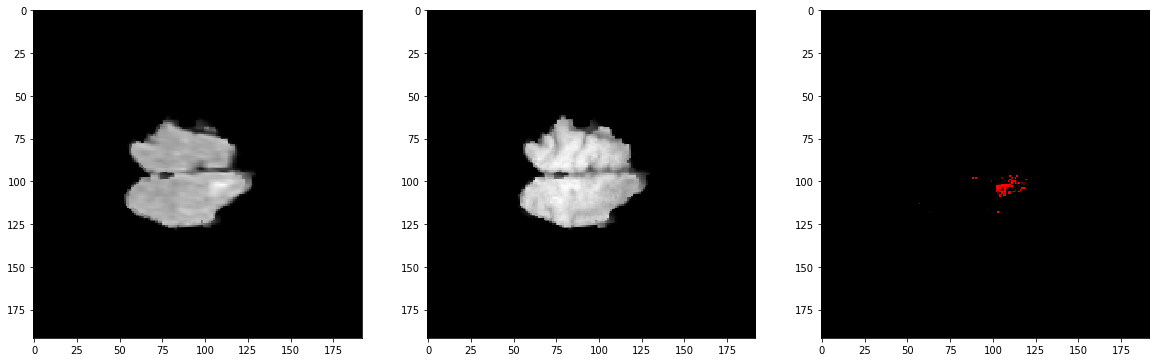


 Slice 122


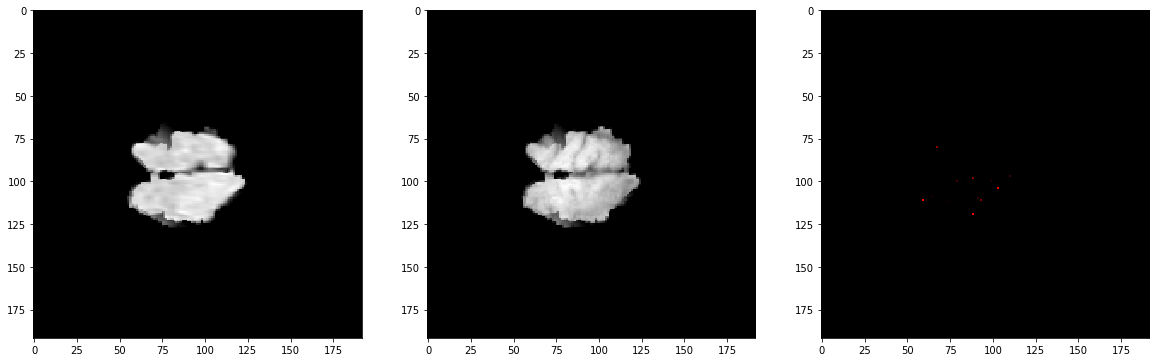


 Slice 123


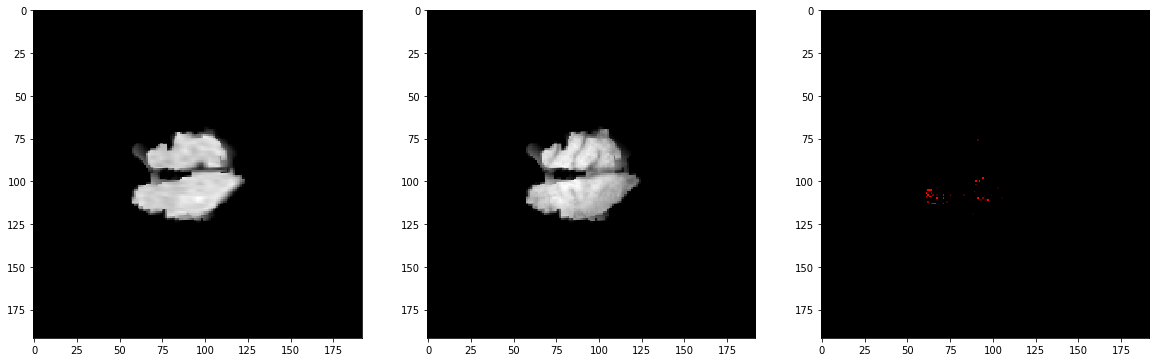


 Slice 124


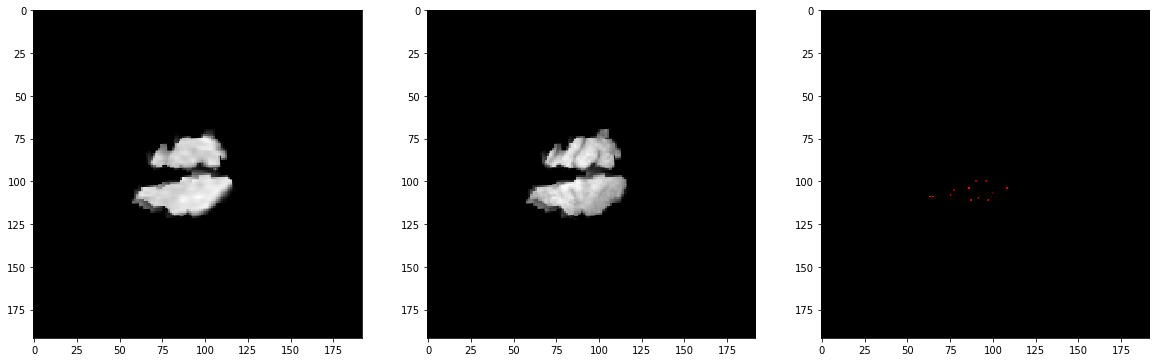


 Slice 125


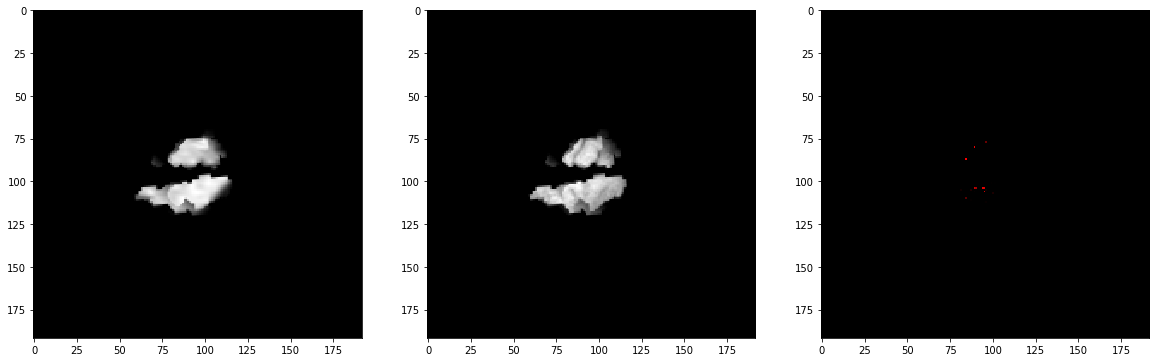


 Slice 126


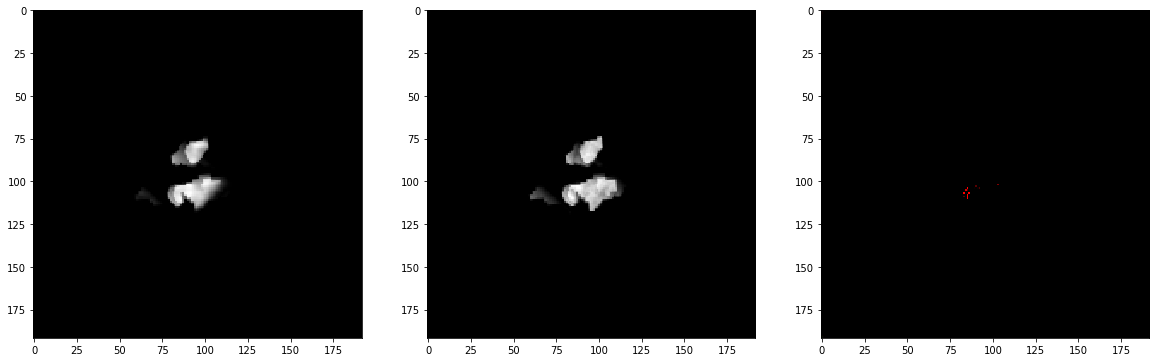


 Slice 127


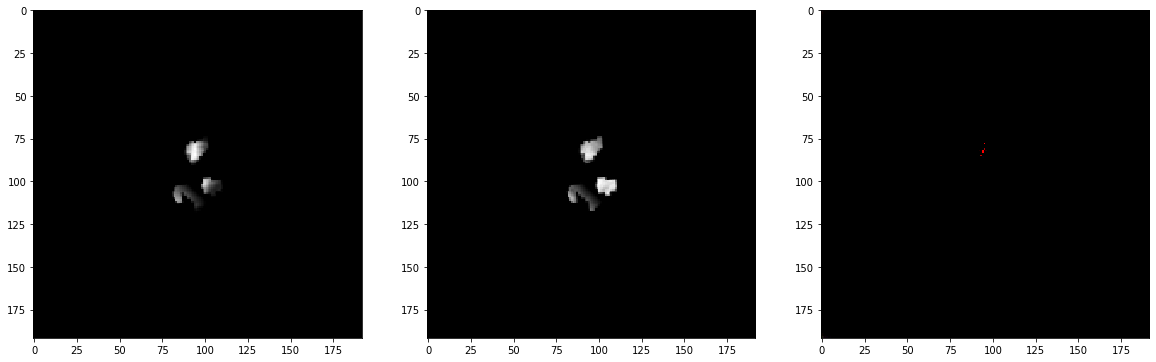


 Slice 128


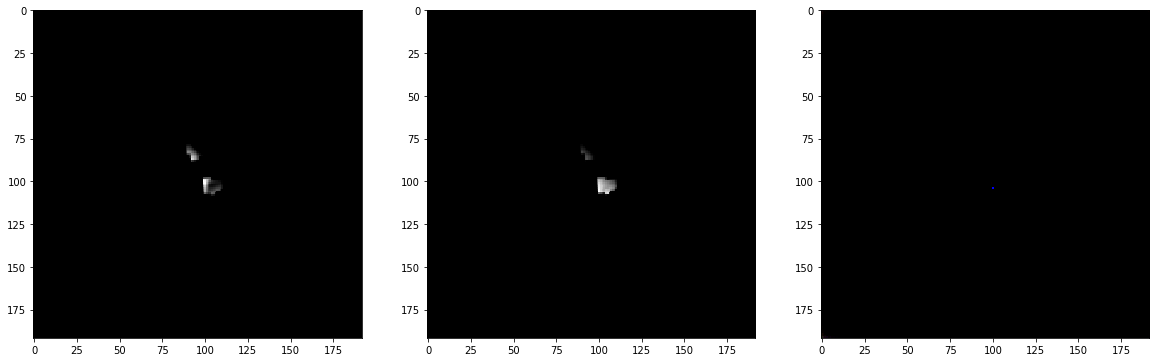

In [2]:
from dataset import *
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sys

#np.set_printoptions(threshold=sys.maxsize)
#clear_output()
tf.reset_default_graph()
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
perform_one_hot=True
binarize_labels=False

#filenames="/home/deivit/Desktop/demo/Test/BRATS_488.tfrecords"
filenames="/home/deivit/Desktop/demo/Test/BRATS_490.tfrecords"
logdir="/tmp/aidl/current"
test_dataset = create_dataset(filenames,mode="testing", num_epochs=1, batch_size=1,perform_one_hot=perform_one_hot,binarize_labels=binarize_labels)
label_input_size,label_output_size=get_tensor_size(perform_one_hot,binarize_labels)


test_iterator = test_dataset.make_one_shot_iterator()
x, y = test_iterator.get_next()

x.set_shape([None, 192, 192, 4])
x = tf.cast(x, tf.float32)

y.set_shape([None, 192, 192, label_input_size])
y = tf.cast(y, tf.int32)

training_placeholder = tf.placeholder(dtype=tf.bool, shape=[], name='training_placeholder')

from models import unet_tensorflow as model
logits, logits_soft = model.unet(x, training=training_placeholder, norm_option=False,drop_val=0.5,label_output_size=label_output_size)
    
saver = tf.train.Saver()

with tf.Session() as sess:

    saver.restore(sess, tf.train.latest_checkpoint(logdir))

    try:
        step=0        
        while True:
            #logits_test,input_test = sess.run([logits_soft,x],feed_dict={training_placeholder:False})
            input_test,label_test,logits_test = sess.run([x,y,logits_soft],feed_dict={training_placeholder:False})
            step += 1      
            print('\n Slice {}'.format(step))
            
            
            pred_image = logits_test[0]
            pred_image = np.reshape(pred_image, (192,192,4))
            
            input_image=input_test[0]
            input_image = np.reshape(input_image, (192,192,4))
            
            label_image=label_test[0]
            #label_image = np.reshape(label_image, (192,192,4))

                
            f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 20))
            ax1.imshow(input_image[:,:,0],cmap='gray')
            ax2.imshow(input_image[:,:,1],cmap='gray')
            ax3.imshow(pred_image[:,:,1:])
            plt.show()
            
    except tf.errors.OutOfRangeError:
        pass
